In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Sample dataset
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Income': [5000] * 10,
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly house rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Random online shopping',
                    'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Transferred to savings'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Analysis: Total Expense per Category
expense_per_category = df.groupby('Category')['Expense'].sum()

# Plot Expense Distribution as Line-Connected Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=expense_per_category.index, y=expense_per_category.values, color='blue', s=100)
plt.plot(expense_per_category.index, expense_per_category.values, linestyle='-', color='blue', marker='o')
plt.xlabel('Category')
plt.ylabel('Total Expense')
plt.title('Expense Distribution by Category')
plt.xticks(rotation=45)
plt.savefig("expense_report.png")  # Save the plot as an image
plt.close()

# AI Model: Unnecessary Expense Detection
unwanted_expenses = df[df['Category'] == 'Unwanted']

# AI Model: Spending Pattern Clustering
X = df[['Expense']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
df['Spending Cluster'] = kmeans.labels_

# Spending Suggestion
most_common_category = Counter(df['Category']).most_common(1)[0][0]

# Monthly Report Summary
total_income = df['Income'].sum()
total_expense = df['Expense'].sum()
savings = total_income - total_expense

# Generate PDF Report
def generate_pdf():
    pdf_filename = "Monthly_Report.pdf"
    c = canvas.Canvas(pdf_filename, pagesize=letter)
    width, height = letter
    y_pos = height - 50
    
    # Title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(200, y_pos, "Monthly Financial Report")
    y_pos -= 40
    
    # Summary
    c.setFont("Helvetica", 12)
    c.drawString(50, y_pos, f"Total Income: ${total_income}")
    y_pos -= 20
    c.drawString(50, y_pos, f"Total Expenses: ${total_expense}")
    y_pos -= 20
    c.drawString(50, y_pos, f"Remaining Savings: ${savings}")
    y_pos -= 40
    
    # Spending Category
    c.drawString(50, y_pos, f"Top Spending Category: {most_common_category}")
    y_pos -= 40
    
    # Unnecessary Expenses
    c.setFont("Helvetica-Bold", 12)
    c.drawString(50, y_pos, "Unnecessary Expenses:")
    y_pos -= 20
    c.setFont("Helvetica", 10)
    for _, row in unwanted_expenses.iterrows():
        c.drawString(70, y_pos, f"{row['Date']} - ${row['Expense']} ({row['Description']})")
        y_pos -= 15
    y_pos -= 40
    
    # Move the Expense Distribution Graph up, right after Unnecessary Expenses
    c.drawImage("expense_report.png", 100, y_pos - 250, width=400, height=250)
    
    c.save()
    print(f"PDF Report Generated: {pdf_filename}")

# Call function to generate the PDF
generate_pdf()


C:\Users\Navthik_rk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


PDF Report Generated: Monthly_Report.pdf


In [2]:
!pip install reportlab


   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   -------------------------------- ------- 1.6/1.9 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 13.4 MB/s eta 0:00:00


In [4]:
import os
print(os.listdir())  # This will list all files in the directory


['.anaconda', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.vscode', 'anaconda3', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'expense_report.png', 'Favorites', 'Links', 'Local Settings', 'MEDX', 'Microsoft', 'Monthly_Report.pdf', 'My Documents', 'myenv', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{032f02cf-4676-11ef-8287-8c47be171a1b}.TM.blf', 'NTUSER.DAT{032f02cf-4676-11ef-8287-8c47be171a1b}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{032f02cf-4676-11ef-8287-8c47be171a1b}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'Templates', 'Untitled.ipynb']


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import IPython.display as display

# Sample dataset
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Income': [5000] * 10,
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly house rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Random online shopping',
                    'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Transferred to savings'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Analysis: Total Expense per Category
expense_per_category = df.groupby('Category')['Expense'].sum()

# Plot Expense Distribution as Line-Connected Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=expense_per_category.index, y=expense_per_category.values, color='blue', s=100)
plt.plot(expense_per_category.index, expense_per_category.values, linestyle='-', color='blue', marker='o')
plt.xlabel('Category')
plt.ylabel('Total Expense')
plt.title('Expense Distribution by Category')
plt.xticks(rotation=45)
plt.savefig("expense_report.png")  # Save the plot as an image
plt.close()

# AI Model: Unnecessary Expense Detection
unwanted_expenses = df[df['Category'] == 'Unwanted']

# AI Model: Spending Pattern Clustering
X = df[['Expense']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
df['Spending Cluster'] = kmeans.labels_

# Spending Suggestion
most_common_category = Counter(df['Category']).most_common(1)[0][0]

# Monthly Report Summary
total_income = df['Income'].sum()
total_expense = df['Expense'].sum()
savings = total_income - total_expense

# Generate PDF Report
def generate_pdf():
    pdf_filename = "Monthly_Report.pdf"
    c = canvas.Canvas(pdf_filename, pagesize=letter)
    width, height = letter
    y_pos = height - 50
    
    # Title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(200, y_pos, "Monthly Financial Report")
    y_pos -= 40
    
    # Summary
    c.setFont("Helvetica", 12)
    c.drawString(50, y_pos, f"Total Income: ${total_income}")
    y_pos -= 20
    c.drawString(50, y_pos, f"Total Expenses: ${total_expense}")
    y_pos -= 20
    c.drawString(50, y_pos, f"Remaining Savings: ${savings}")
    y_pos -= 40
    
    # Spending Category
    c.drawString(50, y_pos, f"Top Spending Category: {most_common_category}")
    y_pos -= 40
    
    # Unnecessary Expenses
    c.setFont("Helvetica-Bold", 12)
    c.drawString(50, y_pos, "Unnecessary Expenses:")
    y_pos -= 20
    c.setFont("Helvetica", 10)
    for _, row in unwanted_expenses.iterrows():
        c.drawString(70, y_pos, f"{row['Date']} - ${row['Expense']} ({row['Description']})")
        y_pos -= 15
    y_pos -= 40
    
    # Move the Expense Distribution Graph up, right after Unnecessary Expenses
    c.drawImage("expense_report.png", 100, y_pos - 250, width=400, height=250)
    
    c.save()
    print(f"PDF Report Generated: {pdf_filename}")
    
    # Display download link for Jupyter Notebook
    display.display(display.FileLink(pdf_filename))

# Call function to generate the PDF
generate_pdf()


PDF Report Generated: Monthly_Report.pdf


C:\Users\Navthik_rk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\Navthik_rk\Monthly_Report.pdf

C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_17596\2805671823.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Category'], rotation=45)


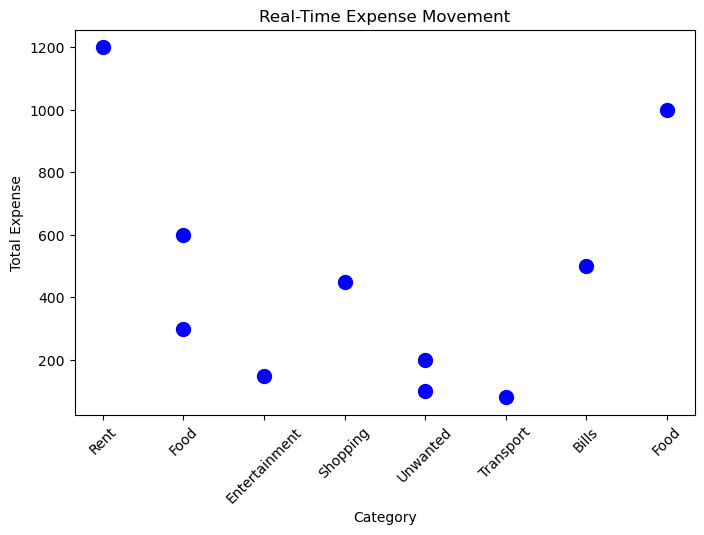

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Sample dataset
data = {
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000]
}

df = pd.DataFrame(data)

# Create figure
fig, ax = plt.subplots(figsize=(8, 5))
scatter = ax.scatter(df['Category'], df['Expense'], color='blue', s=100)
line, = ax.plot([], [], linestyle='-', color='blue', marker='o')

ax.set_xlabel('Category')
ax.set_ylabel('Total Expense')
ax.set_title('Real-Time Expense Movement')
ax.set_xticklabels(df['Category'], rotation=45)

# Function to update the scatter plot
def update(frame):
    # Generate random up/down movement
    df['Expense'] += np.random.randint(-50, 50, size=len(df))
    df['Expense'] = np.clip(df['Expense'], 50, None)  # Prevent negative values

    # Update scatter points
    scatter.set_offsets(np.c_[range(len(df)), df['Expense']])

    # Update line graph to connect points
    line.set_data(range(len(df)), df['Expense'])

    return scatter, line

# Animate
ani = FuncAnimation(fig, update, frames=100, interval=500, blit=False)

plt.show()


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation, PillowWriter
from sklearn.cluster import KMeans
from collections import Counter
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import IPython.display as display

# Sample dataset
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Income': [5000] * 10,
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly house rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Random online shopping',
                    'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Transferred to savings'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Analysis: Total Expense per Category
expense_per_category = df.groupby('Category')['Expense'].sum()

# Create animated scatter plot (GIF)
fig, ax = plt.subplots(figsize=(8, 5))
scatter = ax.scatter(expense_per_category.index, expense_per_category.values, color='blue', s=100)
line, = ax.plot(expense_per_category.index, expense_per_category.values, linestyle='-', color='blue', marker='o')
ax.set_xlabel('Category')
ax.set_ylabel('Total Expense')
ax.set_title('Real-Time Expense Movement')
ax.set_xticklabels(expense_per_category.index, rotation=45)

def update(frame):
    # Generate random up/down movement for ECG-like effect
    fluctuations = np.random.randint(-50, 50, size=len(expense_per_category))
    new_values = expense_per_category.values + fluctuations
    new_values = np.clip(new_values, 50, None)  # Prevent negative values
    scatter.set_offsets(np.c_[range(len(expense_per_category)), new_values])
    line.set_data(range(len(expense_per_category)), new_values)
    return scatter, line

# Save animation as GIF
ani = FuncAnimation(fig, update, frames=50, interval=500, blit=False)
gif_filename = "expense_animation.gif"
ani.save(gif_filename, writer=PillowWriter(fps=10))
plt.close()

# AI Model: Unnecessary Expense Detection
unwanted_expenses = df[df['Category'] == 'Unwanted']

# AI Model: Spending Pattern Clustering
X = df[['Expense']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
df['Spending Cluster'] = kmeans.labels_

# Spending Suggestion
most_common_category = Counter(df['Category']).most_common(1)[0][0]

# Monthly Report Summary
total_income = df['Income'].sum()
total_expense = df['Expense'].sum()
savings = total_income - total_expense

# Generate PDF Report
def generate_pdf():
    pdf_filename = "Monthly_Report.pdf"
    c = canvas.Canvas(pdf_filename, pagesize=letter)
    width, height = letter
    y_pos = height - 50
    
    # Title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(200, y_pos, "Monthly Financial Report")
    y_pos -= 40
    
    # Summary
    c.setFont("Helvetica", 12)
    c.drawString(50, y_pos, f"Total Income: ${total_income}")
    y_pos -= 20
    c.drawString(50, y_pos, f"Total Expenses: ${total_expense}")
    y_pos -= 20
    c.drawString(50, y_pos, f"Remaining Savings: ${savings}")
    y_pos -= 40
    
    # Spending Category
    c.drawString(50, y_pos, f"Top Spending Category: {most_common_category}")
    y_pos -= 40
    
    # Unnecessary Expenses
    c.setFont("Helvetica-Bold", 12)
    c.drawString(50, y_pos, "Unnecessary Expenses:")
    y_pos -= 20
    c.setFont("Helvetica", 10)
    for _, row in unwanted_expenses.iterrows():
        c.drawString(70, y_pos, f"{row['Date']} - ${row['Expense']} ({row['Description']})")
        y_pos -= 15
    y_pos -= 40
    
    # Insert animated GIF
    c.drawImage(gif_filename, 100, y_pos - 250, width=400, height=250)
    
    c.save()
    print(f"PDF Report Generated: {pdf_filename}")
    
    # Display download link for Jupyter Notebook
    display.display(display.FileLink(pdf_filename))

# Call function to generate the PDF
generate_pdf()

C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_17596\3728295267.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(expense_per_category.index, rotation=45)
C:\Users\Navthik_rk\anaconda3\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


PDF Report Generated: Monthly_Report.pdf


C:\Users\Navthik_rk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\Navthik_rk\Monthly_Report.pdf

C:\Users\Navthik_rk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Navthik_rk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Navthik_rk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Navthik_rk\AppDa

Model Accuracy: 50.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



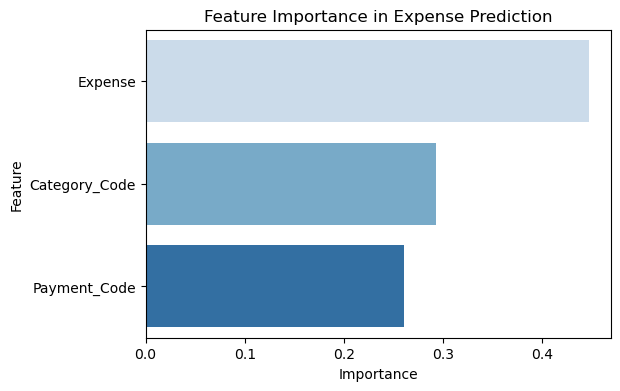

Prediction for $500 in Shopping using Credit Card: Necessary
Prediction for $1000 in Rent using Bank Transfer: Necessary


C:\Users\Navthik_rk\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Navthik_rk\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation, PillowWriter
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import IPython.display as display

# Sample dataset
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Income': [5000] * 10,
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly house rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Random online shopping',
                    'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Transferred to savings'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Label': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0]  # 0 = Necessary, 1 = Unnecessary
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode categorical data
category_mapping = {cat: idx for idx, cat in enumerate(df['Category'].unique())}
df['Category_Code'] = df['Category'].map(category_mapping)
payment_mapping = {method: idx for idx, method in enumerate(df['Payment Method'].unique())}
df['Payment_Code'] = df['Payment Method'].map(payment_mapping)

# Feature selection
X = df[['Expense', 'Category_Code', 'Payment_Code']]
y = df['Label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

# Feature importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance, y=feature_names, palette='Blues')
plt.title("Feature Importance in Expense Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Function to predict new expenses
def predict_expense(category, amount, payment_method):
    category_code = category_mapping.get(category, -1)
    payment_code = payment_mapping.get(payment_method, -1)
    if category_code == -1 or payment_code == -1:
        return "Unknown Category/Payment Method"
    prediction = rf_model.predict([[amount, category_code, payment_code]])[0]
    return "Unnecessary" if prediction == 1 else "Necessary"

# Example Predictions
print("Prediction for $500 in Shopping using Credit Card:", predict_expense("Shopping", 500, "Credit Card"))
print("Prediction for $1000 in Rent using Bank Transfer:", predict_expense("Rent", 1000, "Bank Transfer"))


In [4]:
from google.colab import files
files.download("/mnt/data/Smart_Fam_Monthly_Report.pdf")


ModuleNotFoundError: No module named 'google.colab'

In [5]:
import shutil
shutil.move("/mnt/data/Smart_Fam_Monthly_Report.pdf", "Smart_Fam_Monthly_Report.pdf")


FileNotFoundError: [WinError 3] The system cannot find the path specified

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import os
from matplotlib.animation import FuncAnimation

# Load your dataset
file_path = "your_expense_data.csv"  # Change this to your dataset

# Read dataset
df = pd.read_csv(file_path)

# Process data
monthly_summary = df.groupby("Month").sum().reset_index()

# Categorizing expenses
def categorize_expenses(amount):
    if amount > 5000:
        return "Unnecessary"
    else:
        return "Necessary"

df["Category"] = df["Amount"].apply(categorize_expenses)
necessary_expenses = df[df["Category"] == "Necessary"]["Amount"].sum()
unnecessary_expenses = df[df["Category"] == "Unnecessary"]["Amount"].sum()

# Generate Animated Scatterplot
fig, ax = plt.subplots()
x_data = np.arange(len(monthly_summary))
y_data = monthly_summary["Amount"].values
(line,) = ax.plot([], [], "r-o")

ax.set_xlim(0, len(x_data))
ax.set_ylim(0, max(y_data) * 1.2)

def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(x_data), interval=500, blit=True)
gif_path = "animated_chart.gif"
ani.save(gif_path, writer="pillow")
plt.close()

# Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Smart Fam Monthly Report", ln=True, align="C")
        self.ln(10)
    
    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Summary Data
pdf.cell(200, 10, f"Total Necessary Expenses: ₹{necessary_expenses}", ln=True)
pdf.cell(200, 10, f"Total Unnecessary Expenses: ₹{unnecessary_expenses}", ln=True)
pdf.ln(10)

# Adding GIF
pdf.image(gif_path, x=30, w=150)

# Save PDF
pdf_output = "Smart_Fam_Monthly_Report.pdf"
pdf.output(pdf_output)

print(f"Report Generated: {pdf_output}")

FileNotFoundError: [Errno 2] No such file or directory: 'your_expense_data.csv'

In [7]:
pip install fpdf


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40714 sha256=a8b25c53fb9d0189a612cb44457d04f299c57557c5f117e75e30fced9f43c119
  Stored in directory: c:\users\navthik_rk\appdata\local\pip\cache\wheels\6e\62\11\dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import os
from matplotlib.animation import FuncAnimation

# Load your dataset
file_path = "your_expense_data.csv"  # Change this to your dataset

# Read dataset
df = pd.read_csv(file_path)

# Process data
monthly_summary = df.groupby("Month").sum().reset_index()

# Categorizing expenses
def categorize_expenses(amount):
    if amount > 5000:
        return "Unnecessary"
    else:
        return "Necessary"

df["Category"] = df["Amount"].apply(categorize_expenses)
necessary_expenses = df[df["Category"] == "Necessary"]["Amount"].sum()
unnecessary_expenses = df[df["Category"] == "Unnecessary"]["Amount"].sum()

# Generate Animated Scatterplot
fig, ax = plt.subplots()
x_data = np.arange(len(monthly_summary))
y_data = monthly_summary["Amount"].values
(line,) = ax.plot([], [], "r-o")

ax.set_xlim(0, len(x_data))
ax.set_ylim(0, max(y_data) * 1.2)

def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(x_data), interval=500, blit=True)
gif_path = "animated_chart.gif"
ani.save(gif_path, writer="pillow")
plt.close()

# Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Smart Fam Monthly Report", ln=True, align="C")
        self.ln(10)
    
    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Summary Data
pdf.cell(200, 10, f"Total Necessary Expenses: ₹{necessary_expenses}", ln=True)
pdf.cell(200, 10, f"Total Unnecessary Expenses: ₹{unnecessary_expenses}", ln=True)
pdf.ln(10)

# Adding GIF
pdf.image(gif_path, x=30, w=150)

# Save PDF
pdf_output = "Smart_Fam_Monthly_Report.pdf"
pdf.output(pdf_output)

print(f"Report Generated: {pdf_output}")

FileNotFoundError: [Errno 2] No such file or directory: 'your_expense_data.csv'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import os
from matplotlib.animation import FuncAnimation

# Define directory for reports
reports_dir = "reports"
os.makedirs(reports_dir, exist_ok=True)

# Load your dataset
file_path = os.path.join("data", "your_expense_data.csv")
 # Ensure the correct path

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found: {file_path}")

# Read dataset
df = pd.read_csv(file_path)

# Process data
monthly_summary = df.groupby("Month").sum().reset_index()

# Categorizing expenses
def categorize_expenses(amount):
    return "Unnecessary" if amount > 5000 else "Necessary"

df["Category"] = df["Amount"].apply(categorize_expenses)
necessary_expenses = df[df["Category"] == "Necessary"]["Amount"].sum()
unnecessary_expenses = df[df["Category"] == "Unnecessary"]["Amount"].sum()

# Generate Animated Scatterplot
fig, ax = plt.subplots()
x_data = np.arange(len(monthly_summary))
y_data = monthly_summary["Amount"].values
(line,) = ax.plot([], [], "r-o")

ax.set_xlim(0, len(x_data))
ax.set_ylim(0, max(y_data) * 1.2)

def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(x_data), interval=500, blit=True)

# Save GIF
gif_path = os.path.join(reports_dir, "animated_chart.gif")
ani.save(gif_path, writer="pillow")
plt.close()

# Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Smart Fam Monthly Report", ln=True, align="C")
        self.ln(10)
    
    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Summary Data
pdf.cell(200, 10, f"Total Necessary Expenses: ₹{necessary_expenses}", ln=True)
pdf.cell(200, 10, f"Total Unnecessary Expenses: ₹{unnecessary_expenses}", ln=True)
pdf.ln(10)

# Adding GIF
pdf.image(gif_path, x=30, w=150)

# Save PDF
pdf_output = os.path.join(reports_dir, "Smart_Fam_Monthly_Report.pdf")
pdf.output(pdf_output)

print(f"Report Generated: {pdf_output}")


FileNotFoundError: Dataset not found: data\your_expense_data.csv

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import os
from matplotlib.animation import FuncAnimation

# Define directory for reports
reports_dir = "reports"
os.makedirs(reports_dir, exist_ok=True)

# Load your dataset
file_path = "/mnt/data/expense_data.xlsx"  # Update to the path of the generated Excel dataset

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found: {file_path}")

# Read dataset
df = pd.read_excel(file_path)

# Process data
monthly_summary = df.groupby("Month").sum().reset_index()

# Categorizing expenses
def categorize_expenses(amount):
    return "Unnecessary" if amount > 5000 else "Necessary"

df["Category"] = df["Amount"].apply(categorize_expenses)
necessary_expenses = df[df["Category"] == "Necessary"]["Amount"].sum()
unnecessary_expenses = df[df["Category"] == "Unnecessary"]["Amount"].sum()

# Generate Animated Scatterplot
fig, ax = plt.subplots()
x_data = np.arange(len(monthly_summary))
y_data = monthly_summary["Amount"].values
(line,) = ax.plot([], [], "r-o")

ax.set_xlim(0, len(x_data))
ax.set_ylim(0, max(y_data) * 1.2)

def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(x_data), interval=500, blit=True)

# Save GIF
gif_path = os.path.join(reports_dir, "animated_chart.gif")
ani.save(gif_path, writer="pillow")
plt.close()

# Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Smart Fam Monthly Report", ln=True, align="C")
        self.ln(10)
    
    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Summary Data
pdf.cell(200, 10, f"Total Necessary Expenses: ₹{necessary_expenses}", ln=True)
pdf.cell(200, 10, f"Total Unnecessary Expenses: ₹{unnecessary_expenses}", ln=True)
pdf.ln(10)

# Adding GIF
pdf.image(gif_path, x=30, w=150)

# Save PDF
pdf_output = os.path.join(reports_dir, "Smart_Fam_Monthly_Report.pdf")
pdf.output(pdf_output)

print(f"Report Generated: {pdf_output}")


FileNotFoundError: Dataset not found: /mnt/data/expense_data.xlsx

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import os
from matplotlib.animation import FuncAnimation

# Define directory for reports
reports_dir = "reports"
os.makedirs(reports_dir, exist_ok=True)

# Load your dataset
file_path = r"C:\Users\Navthik_rk\Downloads\expense_data.xlsx"  # Update to your actual file path

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found: {file_path}")

# Read dataset
df = pd.read_excel(file_path)

# Process data
monthly_summary = df.groupby("Month").sum().reset_index()

# Categorizing expenses
def categorize_expenses(amount):
    return "Unnecessary" if amount > 5000 else "Necessary"

df["Category"] = df["Amount"].apply(categorize_expenses)
necessary_expenses = df[df["Category"] == "Necessary"]["Amount"].sum()
unnecessary_expenses = df[df["Category"] == "Unnecessary"]["Amount"].sum()

# Generate Animated Scatterplot
fig, ax = plt.subplots()
x_data = np.arange(len(monthly_summary))
y_data = monthly_summary["Amount"].values
(line,) = ax.plot([], [], "r-o")

ax.set_xlim(0, len(x_data))
ax.set_ylim(0, max(y_data) * 1.2)

def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(x_data), interval=500, blit=True)

# Save GIF
gif_path = os.path.join(reports_dir, "animated_chart.gif")
ani.save(gif_path, writer="pillow")
plt.close()

# Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Smart Fam Monthly Report", ln=True, align="C")
        self.ln(10)
    
    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Summary Data
pdf.cell(200, 10, f"Total Necessary Expenses: ₹{necessary_expenses}", ln=True)
pdf.cell(200, 10, f"Total Unnecessary Expenses: ₹{unnecessary_expenses}", ln=True)
pdf.ln(10)

# Adding GIF
pdf.image(gif_path, x=30, w=150)

# Save PDF
pdf_output = os.path.join(reports_dir, "Smart_Fam_Monthly_Report.pdf")
pdf.output(pdf_output)

print(f"Report Generated: {pdf_output}")


TypeError: datetime64 type does not support sum operations

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import os
from matplotlib.animation import FuncAnimation

# Define directory for reports
reports_dir = "reports"
os.makedirs(reports_dir, exist_ok=True)

# Load your dataset
file_path = r"C:\Users\Navthik_rk\Downloads\expense_data.xlsx"  # Update to your actual file path

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found: {file_path}")

# Read dataset
df = pd.read_excel(file_path)

# Ensure 'Month' column is in the correct format (str or int)
df['Month'] = pd.to_datetime(df['Month'], errors='coerce').dt.strftime('%B')  # Converts to month name or use '%m' for numeric month

# Process data (group by month and sum amounts)
monthly_summary = df.groupby("Month")["Amount"].sum().reset_index()

# Categorizing expenses
def categorize_expenses(amount):
    return "Unnecessary" if amount > 5000 else "Necessary"

df["Category"] = df["Amount"].apply(categorize_expenses)
necessary_expenses = df[df["Category"] == "Necessary"]["Amount"].sum()
unnecessary_expenses = df[df["Category"] == "Unnecessary"]["Amount"].sum()

# Generate Animated Scatterplot
fig, ax = plt.subplots()
x_data = np.arange(len(monthly_summary))
y_data = monthly_summary["Amount"].values
(line,) = ax.plot([], [], "r-o")

ax.set_xlim(0, len(x_data))
ax.set_ylim(0, max(y_data) * 1.2)

def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(x_data), interval=500, blit=True)

# Save GIF
gif_path = os.path.join(reports_dir, "animated_chart.gif")
ani.save(gif_path, writer="pillow")
plt.close()

# Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Smart Fam Monthly Report", ln=True, align="C")
        self.ln(10)
    
    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Summary Data
pdf.cell(200, 10, f"Total Necessary Expenses: ₹{necessary_expenses}", ln=True)
pdf.cell(200, 10, f"Total Unnecessary Expenses: ₹{unnecessary_expenses}", ln=True)
pdf.ln(10)

# Adding GIF
pdf.image(gif_path, x=30, w=150)

# Save PDF
pdf_output = os.path.join(reports_dir, "Smart_Fam_Monthly_Report.pdf")
pdf.output(pdf_output)

print(f"Report Generated: {pdf_output}")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_17596\3780885880.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce').dt.strftime('%B')  # Converts to month name or use '%m' for numeric month


KeyError: 'Column not found: Amount'

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import os
from matplotlib.animation import FuncAnimation

# Define directory for reports
reports_dir = "reports"
os.makedirs(reports_dir, exist_ok=True)

# Load your dataset
file_path = r"C:\Users\Navthik_rk\Downloads\expense_data.xlsx"  # Ensure this is your correct file path

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found: {file_path}")

# Read dataset
df = pd.read_excel(file_path)

# Check the column names to ensure correct reference
print(df.columns)

# Remove any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# If the 'Amount' column has a different name, rename it here (e.g., 'Expense Amount' to 'Amount')
df = df.rename(columns={'Expense Amount': 'Amount'})  # Update this based on your dataset

# Convert 'Month' column to datetime if it's not already, and extract the month name
df['Month'] = pd.to_datetime(df['Month'], errors='coerce').dt.strftime('%B')  # Use '%B' for full month name

# Process data (group by month and sum amounts)
monthly_summary = df.groupby("Month")["Amount"].sum().reset_index()

# Categorizing expenses
def categorize_expenses(amount):
    return "Unnecessary" if amount > 5000 else "Necessary"

df["Category"] = df["Amount"].apply(categorize_expenses)
necessary_expenses = df[df["Category"] == "Necessary"]["Amount"].sum()
unnecessary_expenses = df[df["Category"] == "Unnecessary"]["Amount"].sum()

# Generate Animated Scatterplot
fig, ax = plt.subplots()
x_data = np.arange(len(monthly_summary))
y_data = monthly_summary["Amount"].values
(line,) = ax.plot([], [], "r-o")

ax.set_xlim(0, len(x_data))
ax.set_ylim(0, max(y_data) * 1.2)

def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(x_data), interval=500, blit=True)

# Save GIF
gif_path = os.path.join(reports_dir, "animated_chart.gif")
ani.save(gif_path, writer="pillow")
plt.close()

# Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Smart Fam Monthly Report", ln=True, align="C")
        self.ln(10)
    
    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Summary Data
pdf.cell(200, 10, f"Total Necessary Expenses: ₹{necessary_expenses}", ln=True)
pdf.cell(200, 10, f"Total Unnecessary Expenses: ₹{unnecessary_expenses}", ln=True)
pdf.ln(10)

# Adding GIF
pdf.image(gif_path, x=30, w=150)

# Save PDF
pdf_output = os.path.join(reports_dir, "Smart_Fam_Monthly_Report.pdf")
pdf.output(pdf_output)

print(f"Report Generated: {pdf_output}")



Index(['Date', 'Income', 'Expense', 'Category', 'Description',
       'Payment Method', 'Month', 'Weekday', 'Vendor', 'Region'],
      dtype='object')


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_17596\2843916285.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce').dt.strftime('%B')  # Use '%B' for full month name


KeyError: 'Column not found: Amount'

In [16]:
import pandas as pd

# Load your dataset
file_path = r"C:\Users\Navthik_rk\Downloads\expense_data.xlsx"  # Ensure this is your correct file path

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found: {file_path}")

# Read dataset
df = pd.read_excel(file_path)

# Print column names to see if 'Amount' is present
print("Column Names in Dataset:", df.columns)

# Display the first few rows of the dataframe
print(df.head())


Column Names in Dataset: Index(['Date', 'Income', 'Expense', 'Category', 'Description',
       'Payment Method', 'Month', 'Weekday', 'Vendor', 'Region'],
      dtype='object')
        Date  Income  Expense       Category             Description  \
0 2024-01-01    5000     1200           Rent      Monthly house rent   
1 2024-01-02    5000      300           Food      Groceries & dining   
2 2024-01-03    5000      150  Entertainment           Movie tickets   
3 2024-01-04    5000      450       Shopping             New clothes   
4 2024-01-05    5000      100       Unwanted  Random online shopping   

  Payment Method Month    Weekday       Vendor    Region  
0  Bank Transfer   Jan     Monday  XYZ Rentals     Urban  
1    Credit Card   Jan    Tuesday  GroceryMart     Urban  
2           Cash   Jan  Wednesday     Cineplex     Urban  
3     Debit Card   Jan   Thursday  TrendyStore  Suburban  
4    Credit Card   Jan     Friday     ShopEasy     Rural  


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import os
from matplotlib.animation import FuncAnimation

# Define directory for reports
reports_dir = "reports"
os.makedirs(reports_dir, exist_ok=True)

# Load your dataset
file_path = r"C:\Users\Navthik_rk\Downloads\expense_data.xlsx"  # Ensure this is your correct file path

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found: {file_path}")

# Read dataset
df = pd.read_excel(file_path)

# Check and print column names to ensure correct reference
print("Column Names in Dataset:", df.columns)

# Remove any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Display the first few rows of the dataframe to inspect the data
print(df.head())

# If the 'Amount' column has a different name, rename it here (adjust based on your dataset)
# Uncomment and modify the line below if you need to rename columns
# df = df.rename(columns={'Expense Amount': 'Amount'})  # Update this based on your dataset

# Convert 'Month' column to datetime if it's not already, and extract the month name
df['Month'] = pd.to_datetime(df['Month'], errors='coerce').dt.strftime('%B')  # Use '%B' for full month name

# Check for any missing values or NaNs
print("Missing values in the dataset:")
print(df.isnull().sum())

# Process data (group by month and sum amounts)
monthly_summary = df.groupby("Month")["Amount"].sum().reset_index()

# Categorizing expenses
def categorize_expenses(amount):
    return "Unnecessary" if amount > 5000 else "Necessary"

df["Category"] = df["Amount"].apply(categorize_expenses)
necessary_expenses = df[df["Category"] == "Necessary"]["Amount"].sum()
unnecessary_expenses = df[df["Category"] == "Unnecessary"]["Amount"].sum()

# Generate Animated Scatterplot
fig, ax = plt.subplots()
x_data = np.arange(len(monthly_summary))
y_data = monthly_summary["Amount"].values
(line,) = ax.plot([], [], "r-o")

ax.set_xlim(0, len(x_data))
ax.set_ylim(0, max(y_data) * 1.2)

def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(x_data), interval=500, blit=True)

# Save GIF
gif_path = os.path.join(reports_dir, "animated_chart.gif")
ani.save(gif_path, writer="pillow")
plt.close()

# Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Smart Fam Monthly Report", ln=True, align="C")
        self.ln(10)
    
    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Summary Data
pdf.cell(200, 10, f"Total Necessary Expenses: ₹{necessary_expenses}", ln=True)
pdf.cell(200, 10, f"Total Unnecessary Expenses: ₹{unnecessary_expenses}", ln=True)
pdf.ln(10)

# Adding GIF
pdf.image(gif_path, x=30, w=150)

# Save PDF
pdf_output = os.path.join(reports_dir, "Smart_Fam_Monthly_Report.pdf")
pdf.output(pdf_output)

print(f"Report Generated: {pdf_output}")


Column Names in Dataset: Index(['Date', 'Income', 'Expense', 'Category', 'Description',
       'Payment Method', 'Month', 'Weekday', 'Vendor', 'Region'],
      dtype='object')
        Date  Income  Expense       Category             Description  \
0 2024-01-01    5000     1200           Rent      Monthly house rent   
1 2024-01-02    5000      300           Food      Groceries & dining   
2 2024-01-03    5000      150  Entertainment           Movie tickets   
3 2024-01-04    5000      450       Shopping             New clothes   
4 2024-01-05    5000      100       Unwanted  Random online shopping   

  Payment Method Month    Weekday       Vendor    Region  
0  Bank Transfer   Jan     Monday  XYZ Rentals     Urban  
1    Credit Card   Jan    Tuesday  GroceryMart     Urban  
2           Cash   Jan  Wednesday     Cineplex     Urban  
3     Debit Card   Jan   Thursday  TrendyStore  Suburban  
4    Credit Card   Jan     Friday     ShopEasy     Rural  
Missing values in the dataset:
Date  

C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_17596\2082150098.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce').dt.strftime('%B')  # Use '%B' for full month name


KeyError: 'Column not found: Amount'

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import os
from matplotlib.animation import FuncAnimation

# Define directory for reports
reports_dir = "reports"
os.makedirs(reports_dir, exist_ok=True)

# Load your dataset
file_path = r"C:\Users\Navthik_rk\Downloads\expense_data.xlsx"  # Ensure this is your correct file path

# Read dataset
df = pd.read_excel(file_path)

# Print column names and the first few rows for inspection
print("Column Names in Dataset:", df.columns)
print(df.head())

# If the 'Amount' column is named differently, rename it or update here
df.rename(columns={'Expense Amount': 'Amount'}, inplace=True)  # Change 'Expense Amount' to the correct name if needed

# Convert 'Month' to datetime if needed and extract the month name
df['Month'] = pd.to_datetime(df['Month'], errors='coerce').dt.strftime('%B')  # Use '%B' for full month name

# Process data (group by month and sum amounts)
monthly_summary = df.groupby("Month")["Amount"].sum().reset_index()

# Categorizing expenses
def categorize_expenses(amount):
    return "Unnecessary" if amount > 5000 else "Necessary"

df["Category"] = df["Amount"].apply(categorize_expenses)
necessary_expenses = df[df["Category"] == "Necessary"]["Amount"].sum()
unnecessary_expenses = df[df["Category"] == "Unnecessary"]["Amount"].sum()

# Generate Animated Scatterplot
fig, ax = plt.subplots()
x_data = np.arange(len(monthly_summary))
y_data = monthly_summary["Amount"].values
(line,) = ax.plot([], [], "r-o")

ax.set_xlim(0, len(x_data))
ax.set_ylim(0, max(y_data) * 1.2)

def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(x_data), interval=500, blit=True)

# Save GIF
gif_path = os.path.join(reports_dir, "animated_chart.gif")
ani.save(gif_path, writer="pillow")
plt.close()

# Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Smart Fam Monthly Report", ln=True, align="C")
        self.ln(10)
    
    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Summary Data
pdf.cell(200, 10, f"Total Necessary Expenses: ₹{necessary_expenses}", ln=True)
pdf.cell(200, 10, f"Total Unnecessary Expenses: ₹{unnecessary_expenses}", ln=True)
pdf.ln(10)

# Adding GIF
pdf.image(gif_path, x=30, w=150)

# Save PDF
pdf_output = os.path.join(reports_dir, "Smart_Fam_Monthly_Report.pdf")
pdf.output(pdf_output)

print(f"Report Generated: {pdf_output}")


Column Names in Dataset: Index(['Date', 'Income', 'Expense', 'Category', 'Description',
       'Payment Method', 'Month', 'Weekday', 'Vendor', 'Region'],
      dtype='object')
        Date  Income  Expense       Category             Description  \
0 2024-01-01    5000     1200           Rent      Monthly house rent   
1 2024-01-02    5000      300           Food      Groceries & dining   
2 2024-01-03    5000      150  Entertainment           Movie tickets   
3 2024-01-04    5000      450       Shopping             New clothes   
4 2024-01-05    5000      100       Unwanted  Random online shopping   

  Payment Method Month    Weekday       Vendor    Region  
0  Bank Transfer   Jan     Monday  XYZ Rentals     Urban  
1    Credit Card   Jan    Tuesday  GroceryMart     Urban  
2           Cash   Jan  Wednesday     Cineplex     Urban  
3     Debit Card   Jan   Thursday  TrendyStore  Suburban  
4    Credit Card   Jan     Friday     ShopEasy     Rural  


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_17596\50661150.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce').dt.strftime('%B')  # Use '%B' for full month name


KeyError: 'Column not found: Amount'

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import os
from matplotlib.animation import FuncAnimation

# Define directory for reports
reports_dir = "reports"
os.makedirs(reports_dir, exist_ok=True)

# Load your dataset
file_path = r"C:\Users\Navthik_rk\Downloads\expense_data.xlsx"  # Ensure this is your correct file path

# Read dataset
df = pd.read_excel(file_path)

# Print column names and the first few rows for inspection
print("Column Names in Dataset:", df.columns)
print(df.head())

# If the 'Amount' column is named differently, rename it or update here
df.rename(columns={'Expense Amount': 'Amount'}, inplace=True)  # Change 'Expense Amount' to the correct name if needed

# Convert 'Month' to datetime if needed and extract the month name
df['Month'] = pd.to_datetime(df['Month'], errors='coerce').dt.strftime('%B')  # Use '%B' for full month name

# Process data (group by month and sum amounts)
monthly_summary = df.groupby("Month")["Amount"].sum().reset_index()

# Categorizing expenses
def categorize_expenses(amount):
    return "Unnecessary" if amount > 5000 else "Necessary"

df["Category"] = df["Amount"].apply(categorize_expenses)
necessary_expenses = df[df["Category"] == "Necessary"]["Amount"].sum()
unnecessary_expenses = df[df["Category"] == "Unnecessary"]["Amount"].sum()

# Remove the 'Amount' column from the final report data
df_cleaned = df.drop(columns=['Amount'])

# Generate Animated Scatterplot
fig, ax = plt.subplots()
x_data = np.arange(len(monthly_summary))
y_data = monthly_summary["Amount"].values
(line,) = ax.plot([], [], "r-o")

ax.set_xlim(0, len(x_data))
ax.set_ylim(0, max(y_data) * 1.2)

def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(x_data), interval=500, blit=True)

# Save GIF
gif_path = os.path.join(reports_dir, "animated_chart.gif")
ani.save(gif_path, writer="pillow")
plt.close()

# Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Smart Fam Monthly Report", ln=True, align="C")
        self.ln(10)
    
    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Summary Data
pdf.cell(200, 10, f"Total Necessary Expenses: ₹{necessary_expenses}", ln=True)
pdf.cell(200, 10, f"Total Unnecessary Expenses: ₹{unnecessary_expenses}", ln=True)
pdf.ln(10)

# Adding GIF
pdf.image(gif_path, x=30, w=150)

# Save PDF
pdf_output = os.path.join(reports_dir, "Smart_Fam_Monthly_Report.pdf")
pdf.output(pdf_output)

print(f"Report Generated: {pdf_output}")


Column Names in Dataset: Index(['Date', 'Income', 'Expense', 'Category', 'Description',
       'Payment Method', 'Month', 'Weekday', 'Vendor', 'Region'],
      dtype='object')
        Date  Income  Expense       Category             Description  \
0 2024-01-01    5000     1200           Rent      Monthly house rent   
1 2024-01-02    5000      300           Food      Groceries & dining   
2 2024-01-03    5000      150  Entertainment           Movie tickets   
3 2024-01-04    5000      450       Shopping             New clothes   
4 2024-01-05    5000      100       Unwanted  Random online shopping   

  Payment Method Month    Weekday       Vendor    Region  
0  Bank Transfer   Jan     Monday  XYZ Rentals     Urban  
1    Credit Card   Jan    Tuesday  GroceryMart     Urban  
2           Cash   Jan  Wednesday     Cineplex     Urban  
3     Debit Card   Jan   Thursday  TrendyStore  Suburban  
4    Credit Card   Jan     Friday     ShopEasy     Rural  


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_17596\2707170158.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce').dt.strftime('%B')  # Use '%B' for full month name


KeyError: 'Column not found: Amount'

In [21]:
from fpdf import FPDF

# Create a new PDF document
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", style="B", size=16)

# Header Section (SmartFam Branding)
pdf.set_fill_color(4, 118, 40)  # Dark Blue Header Background
pdf.set_text_color(255, 255, 255)  # White Text
pdf.cell(190, 10, "SmartFam", ln=True, align="C", fill=True)
pdf.ln(5)

# Customer List Report Header
pdf.set_text_color(0, 0, 0)  # Black text for content
pdf.set_font("Arial", style="B", size=14)
pdf.cell(190, 10, "Customer List Report", ln=True, align="C")
pdf.set_font("Arial", size=12)
pdf.cell(190, 8, "As of Today - 04 February 2025", ln=True, align="C")
pdf.ln(5)

# Summary Table
pdf.set_font("Arial", style="B", size=12)
pdf.cell(63, 8, "You'll Get", border=1, align="C")
pdf.cell(63, 8, "You'll Give", border=1, align="C")
pdf.cell(64, 8, "Net Balance", border=1, ln=True, align="C")

pdf.set_font("Arial", size=12)
pdf.cell(63, 8, "INR 0.00", border=1, align="C")
pdf.cell(63, 8, "INR 0.00", border=1, align="C")
pdf.cell(64, 8, "INR 0.00", border=1, ln=True, align="C")

pdf.ln(5)

# Table Header
pdf.set_font("Arial", style="B", size=12)
pdf.cell(50, 8, "Name", border=1, align="C")
pdf.cell(50, 8, "Details", border=1, align="C")
pdf.cell(30, 8, "You'll Get", border=1, align="C")
pdf.cell(30, 8, "You'll Give", border=1, align="C")
pdf.cell(30, 8, "Collection Date", border=1, ln=True, align="C")

# Table Data (Empty since no customers)
pdf.set_font("Arial", size=12)
pdf.cell(50, 8, "Grand Total", border=1, align="C")
pdf.cell(50, 8, "", border=1, align="C")
pdf.cell(30, 8, "0.00", border=1, align="C")
pdf.cell(30, 8, "0.00", border=1, align="C")
pdf.cell(30, 8, "", border=1, ln=True, align="C")

# Footer
pdf.ln(10)
pdf.set_font("Arial", size=10)
pdf.cell(190, 8, "Report Generated : 10:12 AM | 04 Feb '25", ln=True, align="L")

# Save PDF
pdf_filename = "SmartFam_Report_Feb_2025.pdf"
pdf.output(pdf_filename)

print(f"PDF report generated: {pdf_filename}")


PDF report generated: SmartFam_Report_Feb_2025.pdf


In [23]:
from IPython.display import display, FileLink

# Assuming the PDF file is named 'SmartFam_Report_Feb_2025.pdf'
pdf_filename = "SmartFam_Report_Feb_2025.pdf"

# Display a download link
display(FileLink(pdf_filename))


C:\Users\Navthik_rk\SmartFam_Report_Feb_2025.pdf

In [24]:
!pip install fpdf pandas ipywidgets


In [27]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager


(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
C:\Users\Navthik_rk\anaconda3\Lib\site-packages\jupyterlab\debuglog.py:54: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
C:\Users\Navthik_rk\anaconda3\Lib\site-packages\jupyterlab\debuglog.py:55: UserWarning: ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
  warnings.warn(msg[-1].strip())
C:\Users\Navthik_rk\anaconda3\Lib\site-packages\jupyterlab\debuglog.py:56: UserWarning: See the log file for details: C:\Users\NAVTHI~1\AppData\Local\Temp\jupyterlab-debug-er3w0rqa.log
  warnin

In [28]:
import ipywidgets as widgets
widgets.Button(description="Test Button")


Button(description='Test Button', style=ButtonStyle())

In [29]:
generate_pdf()


C:\Users\Navthik_rk\SmartFam_RealTime_Report.pdf

✅ Report generated successfully!


In [30]:
generate_pdf()


C:\Users\Navthik_rk\SmartFam_RealTime_Report.pdf

✅ Report generated successfully!


In [31]:
!pip install fpdf pandas ipywidgets


In [32]:
import pandas as pd
from fpdf import FPDF
from IPython.display import display, FileLink
import ipywidgets as widgets
import datetime

# Sample financial data (Replace this with real data from a database or API)
data = [
    ["2024-01-01", 5000, 1200, "Rent", "House Rent", "Bank Transfer", "Jan"],
    ["2024-01-02", 5000, 300, "Food", "Groceries", "Credit Card", "Jan"],
    ["2024-02-03", 5000, 150, "Entertainment", "Movie Tickets", "Cash", "Feb"],
    ["2024-02-10", 5000, 450, "Shopping", "New Clothes", "Debit Card", "Feb"],
    ["2024-02-15", 5000, 100, "Transport", "Uber Ride", "Digital Wallet", "Feb"],
    ["2024-03-01", 5000, 500, "Bills", "Electricity", "Bank Transfer", "Mar"],
]

df = pd.DataFrame(data, columns=["Date", "Income", "Expense", "Category", "Description", "Payment Method", "Month"])

# Function to generate monthly report
def generate_monthly_report(selected_month):
    filtered_df = df[df["Month"] == selected_month]  # Filter data by month
    
    total_income = filtered_df["Income"].sum()
    total_expense = filtered_df["Expense"].sum()
    net_balance = total_income - total_expense

    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", style="B", size=16)

    # Header (SmartFam Branding)
    pdf.set_fill_color(4, 118, 40)  # Green Background
    pdf.set_text_color(255, 255, 255)
    pdf.cell(190, 10, f"SmartFam Monthly Report ({selected_month})", ln=True, align="C", fill=True)
    pdf.ln(5)

    # Report Date
    pdf.set_text_color(0, 0, 0)
    pdf.set_font("Arial", size=12)
    pdf.cell(190, 10, f"Report Generated: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}", ln=True, align="C")
    pdf.ln(10)

    # Summary Table
    pdf.set_font("Arial", style="B", size=12)
    pdf.cell(63, 10, "Total Income", border=1, align="C")
    pdf.cell(63, 10, "Total Expense", border=1, align="C")
    pdf.cell(64, 10, "Net Balance", border=1, align="C")
    pdf.ln()
    
    pdf.set_font("Arial", size=12)
    pdf.cell(63, 10, f"₹{total_income}", border=1, align="C")
    pdf.cell(63, 10, f"₹{total_expense}", border=1, align="C")
    pdf.cell(64, 10, f"₹{net_balance}", border=1, align="C")
    pdf.ln(10)

    # Detailed Transactions Table
    pdf.set_font("Arial", style="B", size=10)
    headers = ["Date", "Income", "Expense", "Category", "Description"]
    widths = [30, 30, 30, 40, 60]
    
    for i, header in enumerate(headers):
        pdf.cell(widths[i], 10, header, border=1, align="C")
    pdf.ln()

    pdf.set_font("Arial", size=10)
    for _, row in filtered_df.iterrows():
        pdf.cell(30, 10, str(row["Date"]), border=1, align="C")
        pdf.cell(30, 10, str(row["Income"]), border=1, align="C")
        pdf.cell(30, 10, str(row["Expense"]), border=1, align="C")
        pdf.cell(40, 10, str(row["Category"]), border=1, align="C")
        pdf.cell(60, 10, str(row["Description"]), border=1, align="C")
        pdf.ln()

    # Save PDF
    pdf_filename = f"SmartFam_Monthly_Report_{selected_month}.pdf"
    pdf.output(pdf_filename)

    # Provide Download Link
    display(FileLink(pdf_filename))
    print(f"✅ Monthly report for {selected_month} generated successfully!")

# Dropdown to Select Month
month_selector = widgets.Dropdown(
    options=df["Month"].unique(),
    description="Select Month:",
    style={'description_width': 'initial'}
)

# Button to Generate Report
button = widgets.Button(description="Generate Monthly Report")
output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        generate_monthly_report(month_selector.value)

button.on_click(on_button_click)

# Display Widgets
display(month_selector, button, output)


Dropdown(description='Select Month:', options=('Jan', 'Feb', 'Mar'), style=DescriptionStyle(description_width=…

Button(description='Generate Monthly Report', style=ButtonStyle())

Output()

In [34]:
generate_pdf()

C:\Users\Navthik_rk\SmartFam_RealTime_Report.pdf

✅ Report generated successfully!


In [35]:
import pandas as pd
from fpdf import FPDF
from IPython.display import display, FileLink
import ipywidgets as widgets
import datetime

# Sample Sales Data (Date, Product, Price, Quantity, Total Revenue, Cost, Profit)
sales_data = [
    ["2024-01-01", "Laptop", 50000, 2, 100000, 80000, 20000],
    ["2024-01-02", "Smartphone", 30000, 3, 90000, 60000, 30000],
    ["2024-02-03", "Headphones", 2000, 10, 20000, 15000, 5000],
    ["2024-02-10", "Tablet", 25000, 2, 50000, 40000, 10000],
    ["2024-03-01", "Smartwatch", 10000, 5, 50000, 35000, 15000],
]

df = pd.DataFrame(
    sales_data, 
    columns=["Date", "Product", "Price", "Quantity", "Total Revenue", "Cost", "Profit"]
)

df["Month"] = pd.to_datetime(df["Date"]).dt.strftime("%b")  # Convert date to Month abbreviation

# Function to generate sales report
def generate_sales_report(selected_month):
    filtered_df = df[df["Month"] == selected_month]  # Filter sales by month
    
    total_sales = filtered_df["Quantity"].sum()
    total_revenue = filtered_df["Total Revenue"].sum()
    total_profit = filtered_df["Profit"].sum()

    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", style="B", size=16)

    # Header (SmartFam Branding)
    pdf.set_fill_color(4, 118, 40)  # SmartFam Green
    pdf.set_text_color(255, 255, 255)
    pdf.cell(190, 10, f"SmartFam Sales Report ({selected_month})", ln=True, align="C", fill=True)
    pdf.ln(5)

    # Report Date
    pdf.set_text_color(0, 0, 0)
    pdf.set_font("Arial", size=12)
    pdf.cell(190, 10, f"Report Generated: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}", ln=True, align="C")
    pdf.ln(10)

    # Summary Table
    pdf.set_font("Arial", style="B", size=12)
    pdf.cell(63, 10, "Total Sales", border=1, align="C")
    pdf.cell(63, 10, "Total Revenue", border=1, align="C")
    pdf.cell(64, 10, "Total Profit", border=1, align="C")
    pdf.ln()
    
    pdf.set_font("Arial", size=12)
    pdf.cell(63, 10, f"{total_sales} Items", border=1, align="C")
    pdf.cell(63, 10, f"₹{total_revenue}", border=1, align="C")
    pdf.cell(64, 10, f"₹{total_profit}", border=1, align="C")
    pdf.ln(10)

    # Sales Transactions Table
    pdf.set_font("Arial", style="B", size=10)
    headers = ["Date", "Product", "Price", "Quantity", "Revenue", "Profit"]
    widths = [30, 50, 25, 20, 30, 30]
    
    for i, header in enumerate(headers):
        pdf.cell(widths[i], 10, header, border=1, align="C")
    pdf.ln()

    pdf.set_font("Arial", size=10)
    for _, row in filtered_df.iterrows():
        pdf.cell(30, 10, str(row["Date"]), border=1, align="C")
        pdf.cell(50, 10, str(row["Product"]), border=1, align="C")
        pdf.cell(25, 10, f"₹{row['Price']}", border=1, align="C")
        pdf.cell(20, 10, str(row["Quantity"]), border=1, align="C")
        pdf.cell(30, 10, f"₹{row['Total Revenue']}", border=1, align="C")
        pdf.cell(30, 10, f"₹{row['Profit']}", border=1, align="C")
        pdf.ln()

    # Save PDF
    pdf_filename = f"SmartFam_Sales_Report_{selected_month}.pdf"
    pdf.output(pdf_filename)

    # Provide Download Link
    display(FileLink(pdf_filename))
    print(f"✅ Sales report for {selected_month} generated successfully!")

# Dropdown to Select Month
month_selector = widgets.Dropdown(
    options=df["Month"].unique(),
    description="Select Month:",
    style={'description_width': 'initial'}
)

# Button to Generate Report
button = widgets.Button(description="Generate Sales Report")
output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        generate_sales_report(month_selector.value)

button.on_click(on_button_click)

# Display Widgets
display(month_selector, button, output)


Dropdown(description='Select Month:', options=('Jan', 'Feb', 'Mar'), style=DescriptionStyle(description_width=…

Button(description='Generate Sales Report', style=ButtonStyle())

Output()

In [36]:
generate_pdf()

KeyError: 'Income'

In [37]:
print(df.columns)


Index(['Date', 'Product', 'Price', 'Quantity', 'Total Revenue', 'Cost',
       'Profit', 'Month'],
      dtype='object')


In [38]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)  # Trim spaces and lowercase all column names
print(df.columns)  # Check updated column names


Index(['date', 'product', 'price', 'quantity', 'total revenue', 'cost',
       'profit', 'month'],
      dtype='object')


In [39]:
pdf.cell(30, 10, str(row["income"]), border=1, align="C")  # Use lowercase if needed


NameError: name 'row' is not defined

In [40]:
for _, row in df.iterrows():  # Loop through DataFrame rows
    pdf.cell(30, 10, str(row.get("Income", "N/A")), border=1, align="C")  # Use .get() to avoid KeyErrors
    pdf.cell(30, 10, str(row.get("Expense", "N/A")), border=1, align="C")
    pdf.cell(30, 10, str(row.get("Category", "N/A")), border=1, align="C")
    pdf.ln()  # Move to next line in PDF


In [41]:
print(df.head())  # Check the first few rows
print(df.columns)  # Verify column names


         date     product  price  quantity  total revenue   cost  profit month
0  2024-01-01      Laptop  50000         2         100000  80000   20000   Jan
1  2024-01-02  Smartphone  30000         3          90000  60000   30000   Jan
2  2024-02-03  Headphones   2000        10          20000  15000    5000   Feb
3  2024-02-10      Tablet  25000         2          50000  40000   10000   Feb
4  2024-03-01  Smartwatch  10000         5          50000  35000   15000   Mar
Index(['date', 'product', 'price', 'quantity', 'total revenue', 'cost',
       'profit', 'month'],
      dtype='object')


In [44]:
df = pd.read_csv("C:\Users\Navthik_rk\Downloads\expense_data.xlsx)
print(df.head())  # Print first few rows to verify column names


SyntaxError: unterminated string literal (detected at line 1) (1155402321.py, line 1)

In [45]:
import pandas as pd

file_path = r"C:\Users\Navthik_rk\Downloads\expense_data.xlsx"  # Use raw string (r"...") to avoid path issues
df = pd.read_excel(file_path)  # Read Excel file

print(df.head())  # Check the first few rows
print(df.columns)  # Verify column names


        Date  Income  Expense       Category             Description  \
0 2024-01-01    5000     1200           Rent      Monthly house rent   
1 2024-01-02    5000      300           Food      Groceries & dining   
2 2024-01-03    5000      150  Entertainment           Movie tickets   
3 2024-01-04    5000      450       Shopping             New clothes   
4 2024-01-05    5000      100       Unwanted  Random online shopping   

  Payment Method Month    Weekday       Vendor    Region  
0  Bank Transfer   Jan     Monday  XYZ Rentals     Urban  
1    Credit Card   Jan    Tuesday  GroceryMart     Urban  
2           Cash   Jan  Wednesday     Cineplex     Urban  
3     Debit Card   Jan   Thursday  TrendyStore  Suburban  
4    Credit Card   Jan     Friday     ShopEasy     Rural  
Index(['Date', 'Income', 'Expense', 'Category', 'Description',
       'Payment Method', 'Month', 'Weekday', 'Vendor', 'Region'],
      dtype='object')


In [46]:
if "Income" in df.columns:
    pdf.cell(30, 10, str(row["Income"]), border=1, align="C")
else:
    pdf.cell(30, 10, "N/A", border=1, align="C")  # Placeholder if column is missing


KeyError: 'Income'

In [47]:
if "Income" in df.columns:
    income_value = row["Income"]
else:
    income_value = "N/A"  # Default value if column is missing

pdf.cell(30, 10, str(income_value), border=1, align="C")


KeyError: 'Income'

In [48]:
df = pd.read_excel("C:/Users/Navthik_rk/Downloads/expense_data.xlsx", sheet_name="Sheet1")


In [49]:
if "income" in df.columns:  # Use lowercase
    income_value = row["income"]
else:
    income_value = "N/A"

pdf.cell(30, 10, str(income_value), border=1, align="C")


In [50]:
df.columns = df.columns.str.lower()  # Convert to lowercase
print(df.columns.tolist())  # Check updated names


['date', 'income', 'expense', 'category', 'description', 'payment method', 'month', 'weekday', 'vendor', 'region']


In [51]:
import pandas as pd

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly house rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Random online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Transferred to savings'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("SmartFam Financial Report\n")
print(df.to_string(index=False))

# Generate summary
print("\nIncome and Expense Summary")
summary = df.groupby('Category').sum()[['Income', 'Expense']]
summary['Balance'] = summary['Income'] - summary['Expense']
print(summary)

print("\nExpenses by Category")
expenses_by_category = df.groupby('Category').sum()['Expense']
print(expenses_by_category)

print("\nPayment Methods Used")
payment_methods = df.groupby('Payment Method').sum()['Expense']
print(payment_methods)

print("\nTransactions by Region")
transactions_by_region = df.groupby('Region').sum()['Expense']
print(transactions_by_region)


SmartFam Financial Report

      Date  Income  Expense      Category            Description Payment Method Month   Weekday      Vendor   Region
2024-01-01    5000     1200          Rent     Monthly house rent  Bank Transfer   Jan    Monday XYZ Rentals    Urban
2024-01-02    5000      300          Food     Groceries & dining    Credit Card   Jan   Tuesday GroceryMart    Urban
2024-01-03    5000      150 Entertainment          Movie tickets           Cash   Jan Wednesday    Cineplex    Urban
2024-01-04    5000      450      Shopping            New clothes     Debit Card   Jan  Thursday TrendyStore Suburban
2024-01-05    5000      100      Unwanted Random online shopping    Credit Card   Jan    Friday    ShopEasy    Rural
2024-01-06    5000       80     Transport              Uber ride Digital Wallet   Jan  Saturday        Uber    Urban
2024-01-07    5000      500         Bills Electricity & Internet  Bank Transfer   Jan    Sunday  ElectricCo Suburban
2024-01-08    5000      600          

In [52]:
pip install pandas reportlab


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from reportlab.lib.pagesizes import letter
from reportlab.lib.units import inch
from reportlab.pdfgen import canvas

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly house rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Random online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Transferred to savings'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Function to generate PDF
def generate_pdf(dataframe, filename):
    c = canvas.Canvas(filename, pagesize=letter)
    width, height = letter
    c.drawString(1 * inch, height - 1 * inch, "SmartFam Financial Report")
    c.drawString(1 * inch, height - 1.5 * inch, "Report Generation Date: 2025-02-04 12:12:10")

    # Table settings
    x_offset = 1 * inch
    y_offset = height - 2 * inch
    padding = 10

    # Column Headers
    columns = list(dataframe.columns)
    for col_num, column_title in enumerate(columns):
        c.drawString(x_offset + col_num * 1.5 * inch, y_offset, column_title)

    # Table rows
    y_offset -= 0.5 * inch
    for row in dataframe.itertuples(index=False):
        for col_num, value in enumerate(row):
            c.drawString(x_offset + col_num * 1.5 * inch, y_offset, str(value))
        y_offset -= 0.3 * inch

    c.save()

# Generate the PDF
generate_pdf(df, "SmartFam_Financial_Report.pdf")


In [5]:
pip install pandas pdfkit


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pdfkit

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly house rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Random online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Transferred to savings'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert DataFrame to HTML
html = df.to_html(index=False)

# Save HTML to a file
with open("report.html", "w") as file:
    file.write(html)

# Convert HTML file to PDF
pdfkit.from_file("report.html", "SmartFam_Financial_Report.pdf")


OSError: No wkhtmltopdf executable found: "b''"
If this file exists please check that this process can read it or you can pass path to it manually in method call, check README. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf

In [3]:
pip install pandas fpdf2


In [4]:
import pandas as pd
from fpdf import FPDF

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly house rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Random online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Transferred to savings'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C')
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', 'B', 10)
        # Column Headers
        for col in data.columns:
            self.cell(20, 10, col, 1)
        self.ln()

        self.set_font('Arial', '', 10)
        # Rows
        for row in data.itertuples(index=False):
            for value in row:
                self.cell(20, 10, str(value), 1)
            self.ln()

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)

# Save the PDF
pdf.output('SmartFam_Financial_Report.pdf')

print("PDF report generated successfully.")


PDF report generated successfully.


C:\Users\Navthik_rk\anaconda3\Lib\site-packages\fpdf\__init__.py:40: UserWarning: You have both PyFPDF & fpdf2 installed. Both packages cannot be installed at the same time as they share the same module namespace. To only keep fpdf2, run: pip uninstall --yes pypdf && pip install --upgrade fpdf2
  warnings.warn(
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1541722518.py:23: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1541722518.py:24: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1541722518.py:25: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.


In [5]:
import pandas as pd
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly house rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Random online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Transferred to savings'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C')
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', 'B', 10)
        # Column Headers
        for col in data.columns:
            self.cell(20, 10, col, 1)
        self.ln()

        self.set_font('Arial', '', 10)
        # Rows
        for row in data.itertuples(index=False):
            for value in row:
                self.cell(20, 10, str(value), 1)
            self.ln()

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1088916378.py:24: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1088916378.py:25: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1088916378.py:26: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1088916378.py:30: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 10)
C:

C:\Users\Navthik_rk\SmartFam_Financial_Report.pdf

PDF report generated successfully. Click the link above to download.


In [6]:
import pandas as pd
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly house rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Random online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Transferred to savings'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C')
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', 'B', 8)
        col_widths = [25, 18, 20, 30, 50, 30, 15, 20, 30, 20]
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, 10, col, 1)
        self.ln()

        self.set_font('Arial', '', 8)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, 10, str(value), 1)
            self.ln()

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3581405655.py:24: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3581405655.py:25: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3581405655.py:26: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3581405655.py:30: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 8)
C:\

C:\Users\Navthik_rk\SmartFam_Financial_Report.pdf

PDF report generated successfully. Click the link above to download.


In [7]:
import pandas as pd
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly house rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Random online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Transferred to savings'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C')
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', 'B', 7)
        col_widths = [25, 15, 15, 25, 50, 25, 10, 15, 25, 15]
        row_height = 8
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 7)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1290228843.py:24: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1290228843.py:25: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1290228843.py:26: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1290228843.py:30: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 7)
C:\

C:\Users\Navthik_rk\SmartFam_Financial_Report.pdf

PDF report generated successfully. Click the link above to download.


In [8]:
import pandas as pd
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly house rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Random online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Transferred to savings'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C')
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', 'B', 6)
        col_widths = [20, 15, 15, 20, 50, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3705444881.py:24: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3705444881.py:25: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3705444881.py:26: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3705444881.py:30: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 6)
C:\

C:\Users\Navthik_rk\SmartFam_Financial_Report.pdf

PDF report generated successfully. Click the link above to download.


In [9]:
import pandas as pd
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C')
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', 'B', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2664791972.py:24: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2664791972.py:25: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2664791972.py:26: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2664791972.py:30: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 6)
C:\

C:\Users\Navthik_rk\SmartFam_Financial_Report.pdf

PDF report generated successfully. Click the link above to download.


In [14]:
import pandas as pd
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', 'B', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1139048906.py:25: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1139048906.py:26: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1139048906.py:28: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1139048906.py:32: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 

C:\Users\Navthik_rk\SmartFam_Financial_Report.pdf

PDF report generated successfully. Click the link above to download.


In [17]:
import pandas as pd
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'SmartFam Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Generated On: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', 'B', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\81861541.py:26: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\81861541.py:27: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\81861541.py:30: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Generated On: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\81861541.py:34: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 6)
C:\Users\Navthik_rk\

C:\Users\Navthik_rk\SmartFam_Financial_Report.pdf

PDF report generated successfully. Click the link above to download.


In [18]:
pip install pandas fpdf matplotlib


Note: you may need to restart the kernel to use updated packages.


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2609338943.py:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2609338943.py:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2609338943.py:43: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2609338943.py:47: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 

C:\Users\Navthik_rk\SmartFam_Financial_Report.pdf

PDF report generated successfully. Click the link above to download.


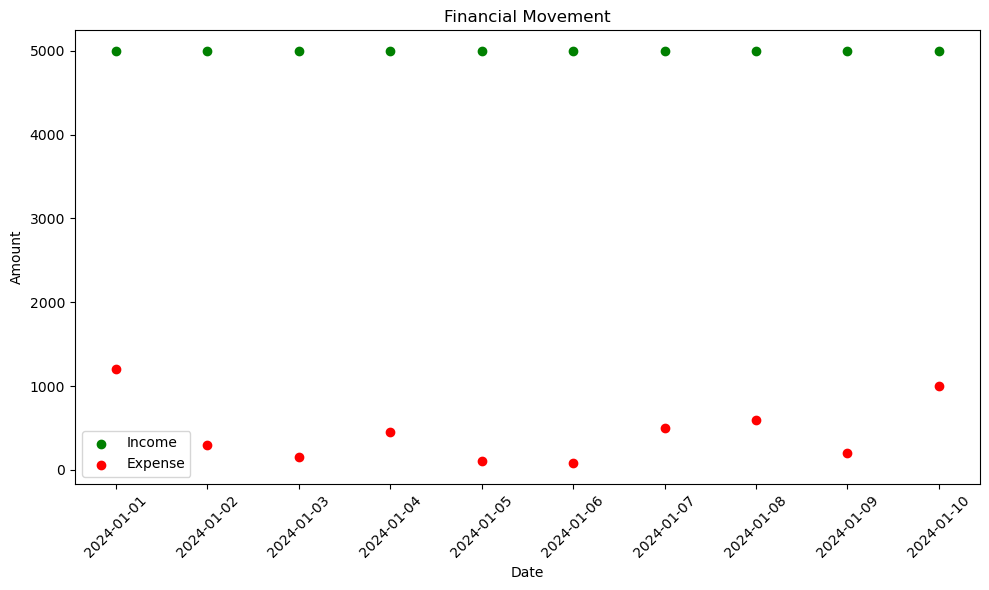

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Income'], label='Income', color='green')
plt.scatter(df['Date'], df['Expense'], label='Expense', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Financial Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', 'B', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def footer(self):
        self.set_y(-60)  # Adjust this value to position the scatter plot
        self.image('scatterplot.png', x=10, y=self.get_y(), w=190)  # Adjust the size as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)
pdf.footer()  # Add scatterplot at the bottom

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2367967844.py:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2367967844.py:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2367967844.py:43: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2367967844.py:47: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 

C:\Users\Navthik_rk\SmartFam_Financial_Report.pdf

PDF report generated successfully. Click the link above to download.


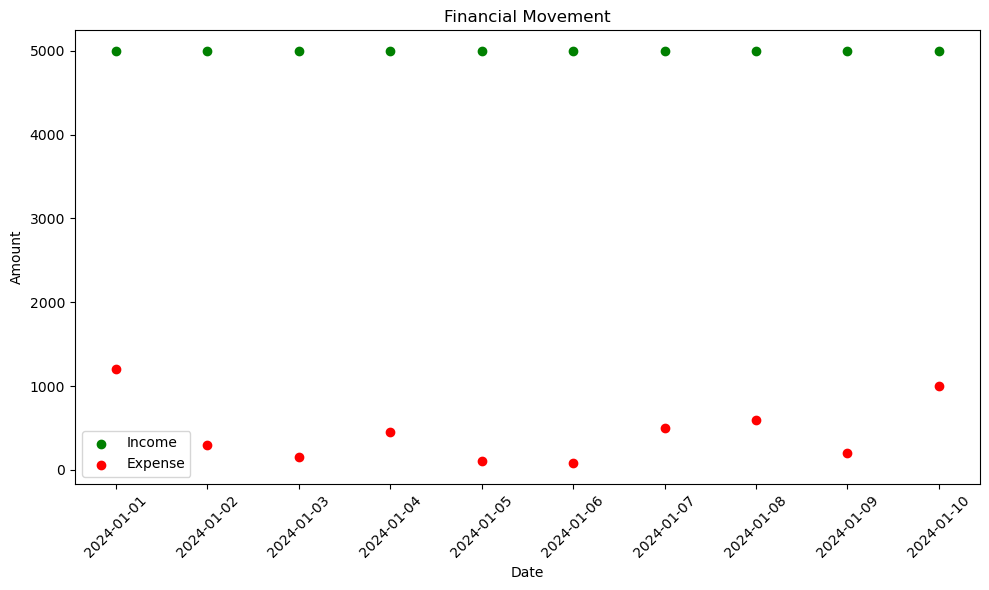

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Income'], label='Income', color='green')
plt.scatter(df['Date'], df['Expense'], label='Expense', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Financial Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', 'B', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def scatterplot(self, image_path):
        self.set_y(-80)  # Adjust this value to position the scatter plot
        self.image(image_path, x=10, y=self.get_y(), w=190)  # Adjust the size as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)
pdf.scatterplot('scatterplot.png')  # Add scatterplot at the bottom

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\4237489601.py:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\4237489601.py:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\4237489601.py:43: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\4237489601.py:47: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 

C:\Users\Navthik_rk\SmartFam_Financial_Report.pdf

PDF report generated successfully. Click the link above to download.


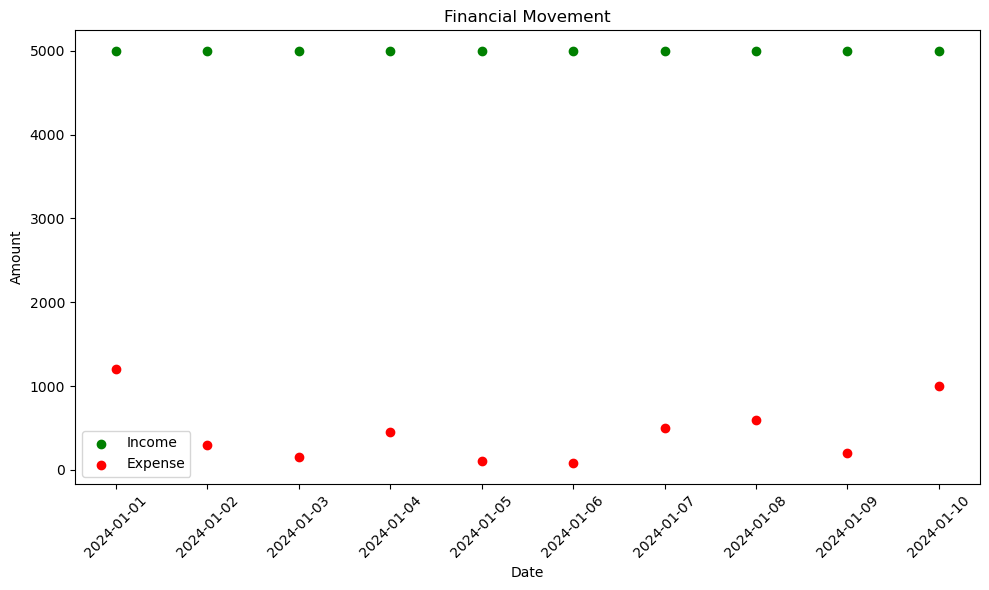

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Income'], label='Income', color='green')
plt.scatter(df['Date'], df['Expense'], label='Expense', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Financial Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', 'B', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def scatterplot(self, image_path):
        self.add_page()  # Add a new page for the scatterplot
        self.image(image_path, x=10, y=30, w=190)  # Adjust the size and position as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)
pdf.scatterplot('scatterplot.png')  # Add scatterplot on a new page

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3957952291.py:48: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3957952291.py:49: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3957952291.py:52: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3957952291.py:73: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 

FPDFUnicodeEncodingException: Character "₹" at index 14 in text is outside the range of characters supported by the font used: "helveticaB". Please consider using a Unicode font.

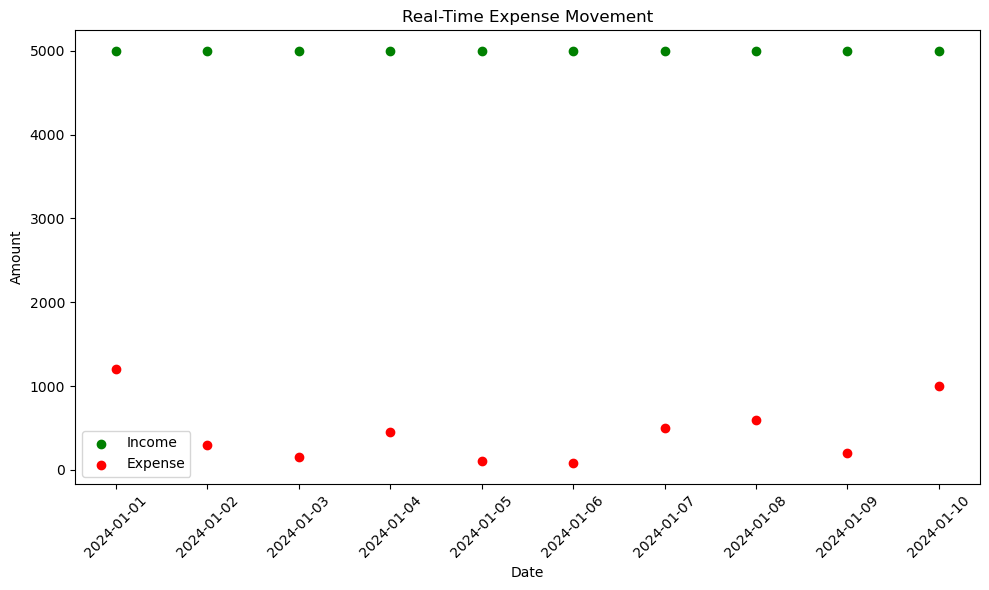

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate summary
total_income = df['Income'].sum()
total_expense = df['Expense'].sum()
remaining_savings = total_income - total_expense
top_spending_category = df.groupby('Category')['Expense'].sum().idxmax()

# Unnecessary expenses
unnecessary_expenses = df[df['Category'] == 'Unwanted']

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Income'], label='Income', color='green')
plt.scatter(df['Date'], df['Expense'], label='Expense', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Real-Time Expense Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', 'B', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def summary(self, total_income, total_expense, remaining_savings, top_spending_category, unnecessary_expenses):
        self.set_font('Arial', 'B', 10)
        self.cell(0, 10, f'Total Income: ₹{total_income}', 0, 1)
        self.cell(0, 10, f'Total Expenses: ₹{total_expense}', 0, 1)
        self.cell(0, 10, f'Remaining Savings: ₹{remaining_savings}', 0, 1)
        self.cell(0, 10, f'Top Spending Category: {top_spending_category}', 0, 1)
        self.ln(10)

        self.set_font('Arial', 'B', 10)
        self.cell(0, 10, 'Unnecessary Expenses:', 0, 1)
        self.set_font('Arial', '', 8)
        for idx, row in unnecessary_expenses.iterrows():
            self.cell(0, 10, f"{row['Date']} - ₹{row['Expense']} ({row['Description']})", 0, 1)
        self.ln(10)

    def scatterplot(self, image_path):
        self.image(image_path, x=10, y=self.get_y(), w=190)  # Adjust the size and position as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.summary(total_income, total_expense, remaining_savings, top_spending_category, unnecessary_expenses)
pdf.table(df)
pdf.add_page()
pdf.scatterplot('scatterplot.png')  # Add scatterplot on a new page

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1495095088.py:48: DeprecationWarning: "uni" parameter is deprecated since v2.5.1, unused and will soon be removed
  self.add_font('DejaVu', '', 'DejaVuSans.ttf', uni=True)


FileNotFoundError: TTF Font file not found: DejaVuSans.ttf

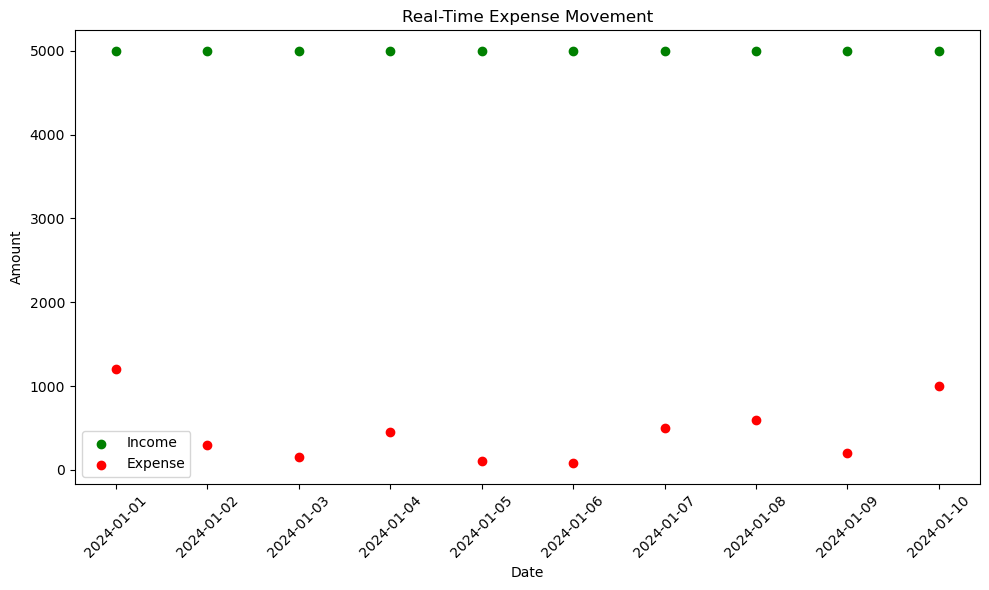

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate summary
total_income = df['Income'].sum()
total_expense = df['Expense'].sum()
remaining_savings = total_income - total_expense
top_spending_category = df.groupby('Category')['Expense'].sum().idxmax()

# Unnecessary expenses
unnecessary_expenses = df[df['Category'] == 'Unwanted']

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Income'], label='Income', color='green')
plt.scatter(df['Date'], df['Expense'], label='Expense', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Real-Time Expense Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.add_font('DejaVu', '', 'DejaVuSans.ttf', uni=True)
        self.set_font('DejaVu', '', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('DejaVu', '', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('DejaVu', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def summary(self, total_income, total_expense, remaining_savings, top_spending_category, unnecessary_expenses):
        self.set_font('DejaVu', '', 10)
        self.cell(0, 10, f'Total Income: ₹{total_income}', 0, 1)
        self.cell(0, 10, f'Total Expenses: ₹{total_expense}', 0, 1)
        self.cell(0, 10, f'Remaining Savings: ₹{remaining_savings}', 0, 1)
        self.cell(0, 10, f'Top Spending Category: {top_spending_category}', 0, 1)
        self.ln(10)

        self.set_font('DejaVu', '', 10)
        self.cell(0, 10, 'Unnecessary Expenses:', 0, 1)
        self.set_font('DejaVu', '', 8)
        for idx, row in unnecessary_expenses.iterrows():
            self.cell(0, 10, f"{row['Date']} - ₹{row['Expense']} ({row['Description']})", 0, 1)
        self.ln(10)

    def scatterplot(self, image_path):
        self.image(image_path, x=10, y=self.get_y(), w=190)  # Adjust the size and position as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.summary(total_income, total_expense, remaining_savings, top_spending_category, unnecessary_expenses)
pdf.table(df)
pdf.add_page()
pdf.scatterplot('scatterplot.png')  # Add scatterplot on a new page

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3131700452.py:93: DeprecationWarning: "uni" parameter is deprecated since v2.5.1, unused and will soon be removed
  pdf.add_font('DejaVu', '', 'DejaVuSans.ttf', uni=True)  # Ensure font is added before use


FileNotFoundError: TTF Font file not found: DejaVuSans.ttf

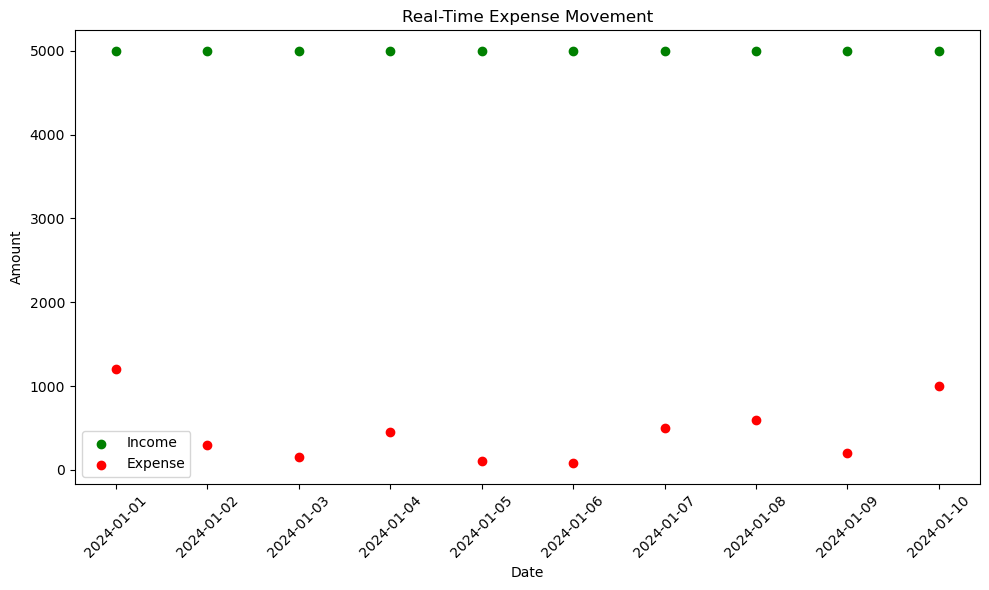

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate summary
total_income = df['Income'].sum()
total_expense = df['Expense'].sum()
remaining_savings = total_income - total_expense
top_spending_category = df.groupby('Category')['Expense'].sum().idxmax()

# Unnecessary expenses
unnecessary_expenses = df[df['Category'] == 'Unwanted']

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Income'], label='Income', color='green')
plt.scatter(df['Date'], df['Expense'], label='Expense', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Real-Time Expense Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.add_font('DejaVu', '', 'DejaVuSans.ttf')
        self.set_font('DejaVu', '', 12)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('DejaVu', '', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('DejaVu', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def summary(self, total_income, total_expense, remaining_savings, top_spending_category, unnecessary_expenses):
        self.set_font('DejaVu', '', 10)
        self.cell(0, 10, f'Total Income: ₹{total_income}', 0, 1)
        self.cell(0, 10, f'Total Expenses: ₹{total_expense}', 0, 1)
        self.cell(0, 10, f'Remaining Savings: ₹{remaining_savings}', 0, 1)
        self.cell(0, 10, f'Top Spending Category: {top_spending_category}', 0, 1)
        self.ln(10)

        self.set_font('DejaVu', '', 10)
        self.cell(0, 10, 'Unnecessary Expenses:', 0, 1)
        self.set_font('DejaVu', '', 8)
        for idx, row in unnecessary_expenses.iterrows():
            self.cell(0, 10, f"{row['Date']} - ₹{row['Expense']} ({row['Description']})", 0, 1)
        self.ln(10)

    def scatterplot(self, image_path):
        self.image(image_path, x=10, y=self.get_y(), w=190)  # Adjust the size and position as needed

# Create a PDF object
pdf = PDF()
pdf.add_font('DejaVu', '', 'DejaVuSans.ttf', uni=True)  # Ensure font is added before use
pdf.add_page()
pdf.summary(total_income, total_expense, remaining_savings, top_spending_category, unnecessary_expenses)
pdf.table(df)
pdf.add_page()
pdf.scatterplot('scatterplot.png')  # Add scatterplot on a new page

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


In [25]:
pdf.add_font('Arial', '', '', uni=True)  # Use Arial or any default font


ValueError: "fname" parameter is required

C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3393246414.py:48: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', '', 12)  # Use default Arial font
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3393246414.py:49: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3393246414.py:52: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3393246414.py:73: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed


FPDFUnicodeEncodingException: Character "₹" at index 14 in text is outside the range of characters supported by the font used: "helvetica". Please consider using a Unicode font.

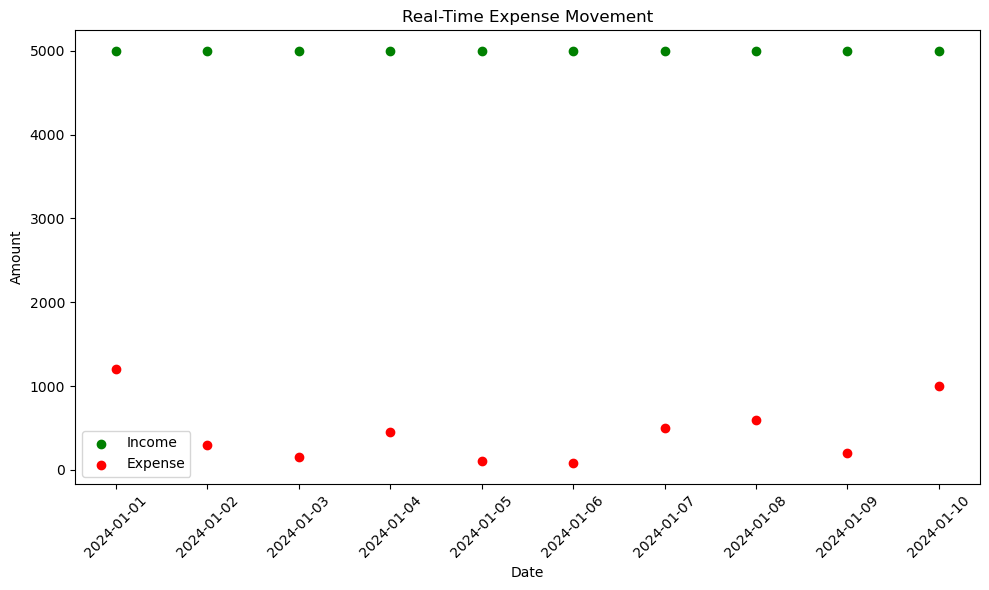

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate summary
total_income = df['Income'].sum()
total_expense = df['Expense'].sum()
remaining_savings = total_income - total_expense
top_spending_category = df.groupby('Category')['Expense'].sum().idxmax()

# Unnecessary expenses
unnecessary_expenses = df[df['Category'] == 'Unwanted']

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Income'], label='Income', color='green')
plt.scatter(df['Date'], df['Expense'], label='Expense', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Real-Time Expense Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', '', 12)  # Use default Arial font
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', '', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def summary(self, total_income, total_expense, remaining_savings, top_spending_category, unnecessary_expenses):
        self.set_font('Arial', '', 10)
        self.cell(0, 10, f'Total Income: ₹{total_income}', 0, 1)
        self.cell(0, 10, f'Total Expenses: ₹{total_expense}', 0, 1)
        self.cell(0, 10, f'Remaining Savings: ₹{remaining_savings}', 0, 1)
        self.cell(0, 10, f'Top Spending Category: {top_spending_category}', 0, 1)
        self.ln(10)

        self.set_font('Arial', '', 10)
        self.cell(0, 10, 'Unnecessary Expenses:', 0, 1)
        self.set_font('Arial', '', 8)
        for idx, row in unnecessary_expenses.iterrows():
            self.cell(0, 10, f"{row['Date']} - ₹{row['Expense']} ({row['Description']})", 0, 1)
        self.ln(10)

    def scatterplot(self, image_path):
        self.image(image_path, x=10, y=self.get_y(), w=190)  # Adjust the size and position as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.summary(total_income, total_expense, remaining_savings, top_spending_category, unnecessary_expenses)
pdf.table(df)
pdf.add_page()
pdf.scatterplot('scatterplot.png')  # Add scatterplot on a new page

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


In [27]:
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', '', 12)  # Default font (Arial)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def summary(self, total_income, total_expense, remaining_savings, top_spending_category, unnecessary_expenses):
        self.set_font('Arial', '', 10)
        self.cell(0, 10, f'Total Income: INR {total_income}', 0, 1)  # Use INR instead of ₹
        self.cell(0, 10, f'Total Expenses: INR {total_expense}', 0, 1)
        self.cell(0, 10, f'Remaining Savings: INR {remaining_savings}', 0, 1)
        self.cell(0, 10, f'Top Spending Category: {top_spending_category}', 0, 1)
        self.ln(10)

        self.set_font('Arial', '', 10)
        self.cell(0, 10, 'Unnecessary Expenses:', 0, 1)
        self.set_font('Arial', '', 8)
        for idx, row in unnecessary_expenses.iterrows():
            self.cell(0, 10, f"{row['Date']} - INR {row['Expense']} ({row['Description']})", 0, 1)
        self.ln(10)


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\395150701.py:48: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', '', 12)  # Default font (Arial)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\395150701.py:49: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\395150701.py:52: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\395150701.py:73: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self

C:\Users\Navthik_rk\SmartFam_Financial_Report.pdf

PDF report generated successfully. Click the link above to download.


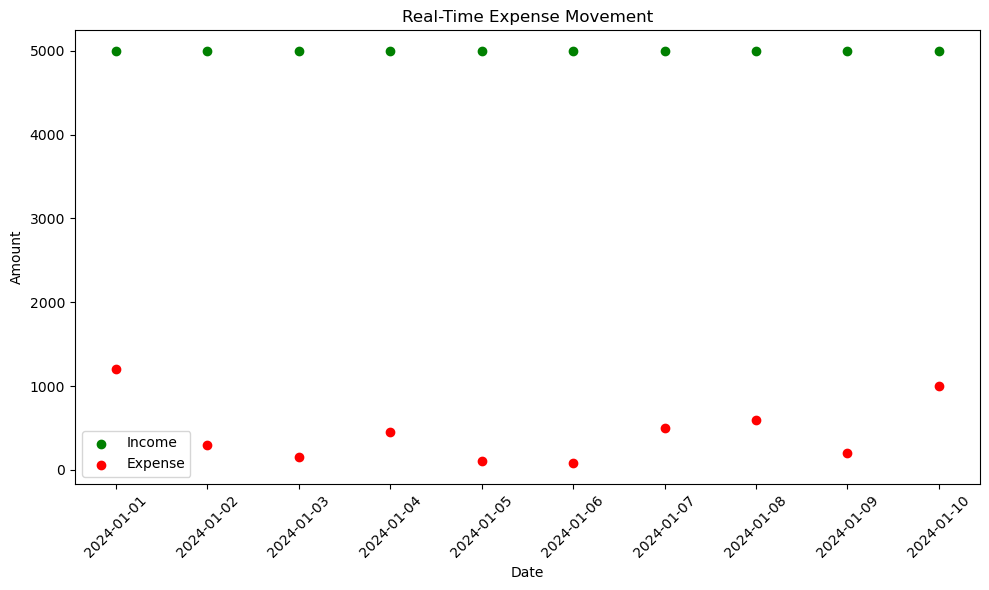

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate summary
total_income = df['Income'].sum()
total_expense = df['Expense'].sum()
remaining_savings = total_income - total_expense
top_spending_category = df.groupby('Category')['Expense'].sum().idxmax()

# Unnecessary expenses
unnecessary_expenses = df[df['Category'] == 'Unwanted']

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Income'], label='Income', color='green')
plt.scatter(df['Date'], df['Expense'], label='Expense', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Real-Time Expense Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', '', 12)  # Default font (Arial)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', '', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def summary(self, total_income, total_expense, remaining_savings, top_spending_category, unnecessary_expenses):
        self.set_font('Arial', '', 10)
        self.cell(0, 10, f'Total Income: INR {total_income}', 0, 1)  # Use INR instead of ₹
        self.cell(0, 10, f'Total Expenses: INR {total_expense}', 0, 1)
        self.cell(0, 10, f'Remaining Savings: INR {remaining_savings}', 0, 1)
        self.cell(0, 10, f'Top Spending Category: {top_spending_category}', 0, 1)
        self.ln(10)

        self.set_font('Arial', '', 10)
        self.cell(0, 10, 'Unnecessary Expenses:', 0, 1)
        self.set_font('Arial', '', 8)
        for idx, row in unnecessary_expenses.iterrows():
            self.cell(0, 10, f"{row['Date']} - INR {row['Expense']} ({row['Description']})", 0, 1)
        self.ln(10)

    def scatterplot(self, image_path):
        self.image(image_path, x=10, y=self.get_y(), w=190)  # Adjust the size and position as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.summary(total_income, total_expense, remaining_savings, top_spending_category, unnecessary_expenses)
pdf.table(df)
pdf.add_page()
pdf.scatterplot('scatterplot.png')  # Add scatterplot on a new page

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\4124054299.py:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', '', 12)  # Default font (Arial)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\4124054299.py:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\4124054299.py:43: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\4124054299.py:47: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  

C:\Users\Navthik_rk\SmartFam_Financial_Report.pdf

PDF report generated successfully. Click the link above to download.


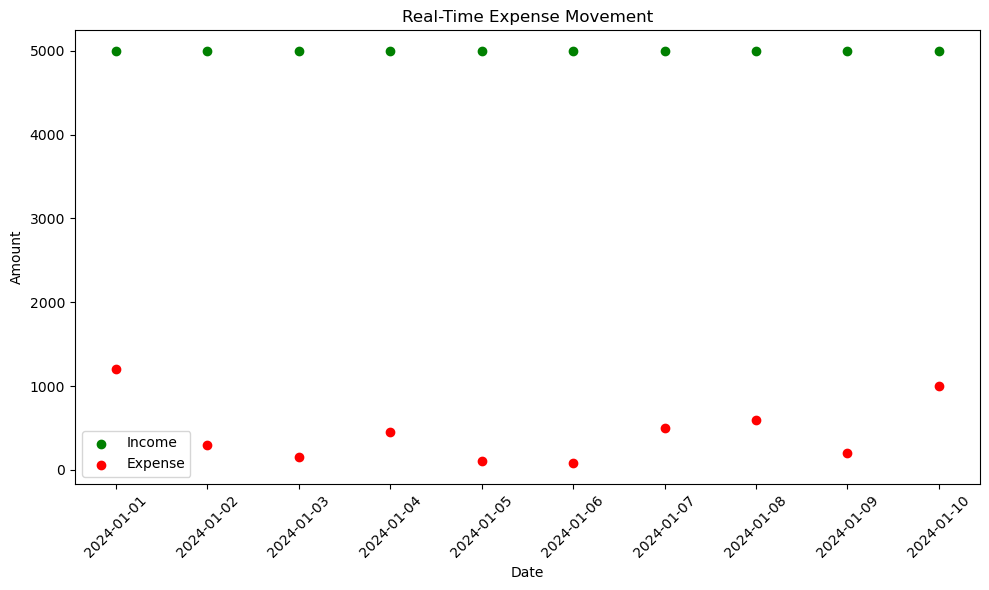

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Income'], label='Income', color='green')
plt.scatter(df['Date'], df['Expense'], label='Expense', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Real-Time Expense Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', '', 12)  # Default font (Arial)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', '', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def scatterplot(self, image_path):
        self.image(image_path, x=10, y=self.get_y(), w=190)  # Adjust the size and position as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)  # Only the table
pdf.add_page()
pdf.scatterplot('scatterplot.png')  # Add scatterplot on a new page

# Save the PDF
pdf_file = 'SmartFam_Financial_Report.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2776444510.py:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', '', 12)  # Default font (Arial)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2776444510.py:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2776444510.py:43: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\2776444510.py:47: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  

C:\Users\Navthik_rk\SmartFam_Financial_Report_Single_Page.pdf

Single-page PDF report generated successfully. Click the link above to download.


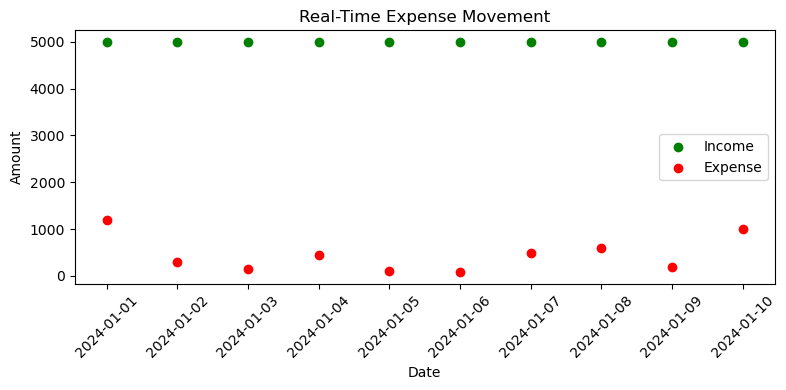

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Generate scatter plot
plt.figure(figsize=(8, 4))  # Adjusted figure size for better fit
plt.scatter(df['Date'], df['Income'], label='Income', color='green')
plt.scatter(df['Date'], df['Expense'], label='Expense', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Real-Time Expense Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', '', 12)  # Default font (Arial)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', '', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def scatterplot(self, image_path):
        self.image(image_path, x=10, y=self.get_y(), w=190)  # Adjust the size and position as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)  # Only the table
pdf.ln(90)  # Add line break to push scatter plot down (adjust if necessary)
pdf.scatterplot('scatterplot.png')  # Add scatterplot on a new page

# Save the PDF
pdf_file = 'SmartFam_Financial_Report_Single_Page.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("Single-page PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3019791148.py:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', '', 12)  # Default font (Arial)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3019791148.py:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3019791148.py:43: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3019791148.py:47: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  

C:\Users\Navthik_rk\SmartFam_Financial_Report_Single_Page.pdf

Single-page PDF report generated successfully. Click the link above to download.


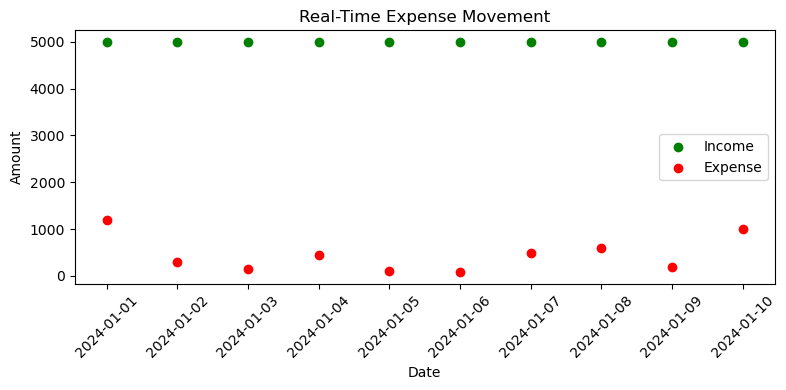

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Generate scatter plot
plt.figure(figsize=(8, 4))  # Adjusted figure size for better fit
plt.scatter(df['Date'], df['Income'], label='Income', color='green')
plt.scatter(df['Date'], df['Expense'], label='Expense', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Real-Time Expense Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', '', 12)  # Default font (Arial)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', '', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def scatterplot(self, image_path):
        self.image(image_path, x=10, y=self.get_y(), w=190)  # Adjust the size and position as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)  # Only the table
pdf.ln(70)  # Reduced line break to bring scatter plot closer
pdf.scatterplot('scatterplot.png')  # Add scatterplot

# Save the PDF
pdf_file = 'SmartFam_Financial_Report_Single_Page.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("Single-page PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1614015466.py:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', '', 12)  # Default font (Arial)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1614015466.py:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1614015466.py:43: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1614015466.py:47: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  

C:\Users\Navthik_rk\SmartFam_Financial_Report_Single_Page.pdf

Single-page PDF report generated successfully. Click the link above to download.


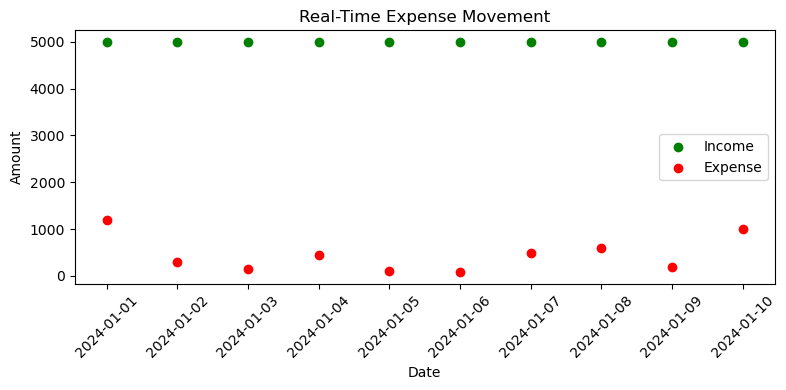

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Generate scatter plot
plt.figure(figsize=(8, 4))  # Adjusted figure size for better fit
plt.scatter(df['Date'], df['Income'], label='Income', color='green')
plt.scatter(df['Date'], df['Expense'], label='Expense', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Real-Time Expense Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', '', 12)  # Default font (Arial)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', '', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def scatterplot(self, image_path):
        self.image(image_path, x=10, y=self.get_y(), w=190)  # Adjust the size and position as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)  # Only the table
pdf.ln(50)  # Further reduced line break
pdf.scatterplot('scatterplot.png')  # Add scatterplot

# Save the PDF
pdf_file = 'SmartFam_Financial_Report_Single_Page.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("Single-page PDF report generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1002230089.py:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', '', 12)  # Default font (Arial)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1002230089.py:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1002230089.py:43: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1002230089.py:47: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  

C:\Users\Navthik_rk\SmartFam_Financial_Report_Single_Page_With_Lines.pdf

Single-page PDF report with lines on scatterplot generated successfully. Click the link above to download.


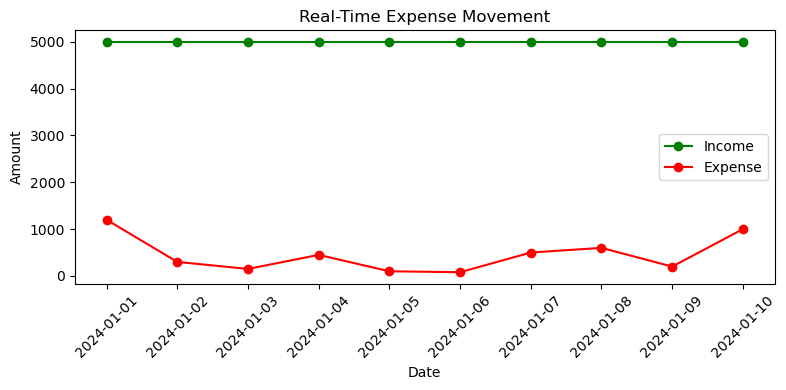

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Generate scatter plot with lines connecting the points
plt.figure(figsize=(8, 4))  # Adjusted figure size for better fit
plt.plot(df['Date'], df['Income'], label='Income', color='green', marker='o')  # Line with dots for Income
plt.plot(df['Date'], df['Expense'], label='Expense', color='red', marker='o')  # Line with dots for Expense
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Real-Time Expense Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot_with_lines.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', '', 12)  # Default font (Arial)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(10)

    def table(self, data):
        self.set_font('Arial', '', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def scatterplot(self, image_path):
        self.image(image_path, x=10, y=self.get_y(), w=190)  # Adjust the size and position as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)  # Only the table
pdf.ln(50)  # Further reduced line break
pdf.scatterplot('scatterplot_with_lines.png')  # Add scatterplot with lines

# Save the PDF
pdf_file = 'SmartFam_Financial_Report_Single_Page_With_Lines.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("Single-page PDF report with lines on scatterplot generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3944223576.py:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', '', 12)  # Default font (Arial)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3944223576.py:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3944223576.py:43: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\3944223576.py:47: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  

C:\Users\Navthik_rk\SmartFam_Financial_Report_Single_Page_With_Lines_Minimal_Space.pdf

Single-page PDF report with lines on scatterplot and reduced space generated successfully. Click the link above to download.


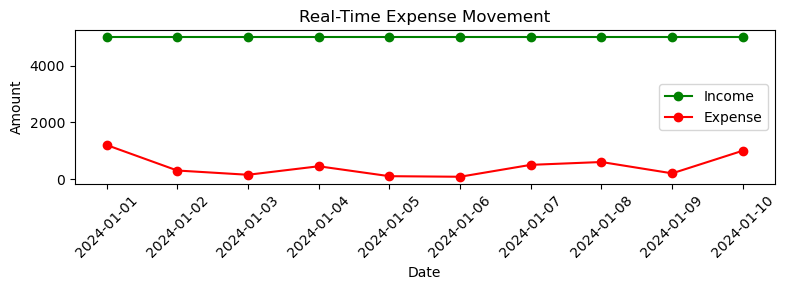

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Generate scatter plot with lines connecting the points
plt.figure(figsize=(8, 3))  # Reduced figure size to fit more on a single page
plt.plot(df['Date'], df['Income'], label='Income', color='green', marker='o')  # Line with dots for Income
plt.plot(df['Date'], df['Expense'], label='Expense', color='red', marker='o')  # Line with dots for Expense
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Real-Time Expense Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot_with_lines.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', '', 12)  # Default font (Arial)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(5)  # Reduced line break after header

    def table(self, data):
        self.set_font('Arial', '', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def scatterplot(self, image_path):
        self.image(image_path, x=10, y=self.get_y(), w=190)  # Adjust the size and position as needed

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)  # Only the table
pdf.ln(7)  # Minimal space before the scatterplot
pdf.scatterplot('scatterplot_with_lines.png')  # Add scatterplot with lines

# Save the PDF
pdf_file = 'SmartFam_Financial_Report_Single_Page_With_Lines_Minimal_Space.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("Single-page PDF report with lines on scatterplot and reduced space generated successfully. Click the link above to download.")


C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1252435759.py:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', '', 12)  # Default font (Arial)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1252435759.py:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1252435759.py:43: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
C:\Users\Navthik_rk\AppData\Local\Temp\ipykernel_15504\1252435759.py:47: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  

C:\Users\Navthik_rk\SmartFam_Financial_Report_Single_Page_With_Lines_Minimal_Space_Moved_Left.pdf

Single-page PDF report with lines on scatterplot, reduced space, and scatterplot moved left generated successfully. Click the link above to download.


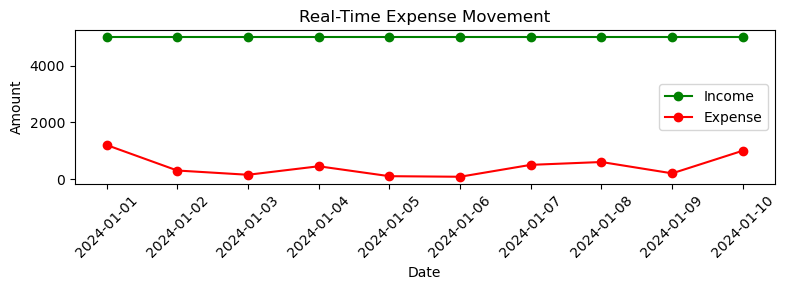

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from IPython.display import FileLink

# Create the dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Income': [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
    'Expense': [1200, 300, 150, 450, 100, 80, 500, 600, 200, 1000],
    'Category': ['Rent', 'Food', 'Entertainment', 'Shopping', 'Unwanted', 'Transport', 'Bills', 'Food', 'Unwanted', 'Savings'],
    'Description': ['Monthly rent', 'Groceries & dining', 'Movie tickets', 'New clothes', 'Online shopping', 'Uber ride', 'Electricity & Internet', 'Restaurants', 'Impulse shopping', 'Savings transfer'],
    'Payment Method': ['Bank Transfer', 'Credit Card', 'Cash', 'Debit Card', 'Credit Card', 'Digital Wallet', 'Bank Transfer', 'Debit Card', 'Cash', 'Bank Transfer'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    'Vendor': ['XYZ Rentals', 'GroceryMart', 'Cineplex', 'TrendyStore', 'ShopEasy', 'Uber', 'ElectricCo', 'FoodBites', 'ShopOnline', 'SavingsBank'],
    'Region': ['Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Generate scatter plot with lines connecting the points
plt.figure(figsize=(8, 3))  # Reduced figure size to fit more on a single page
plt.plot(df['Date'], df['Income'], label='Income', color='green', marker='o')  # Line with dots for Income
plt.plot(df['Date'], df['Expense'], label='Expense', color='red', marker='o')  # Line with dots for Expense
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Real-Time Expense Movement')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('scatterplot_with_lines.png')

class PDF(FPDF):
    def header(self):
        self.set_fill_color(4, 118, 40)  # Set fill color to green
        self.set_text_color(255, 255, 255)  # Set text color to white
        self.set_font('Arial', '', 12)  # Default font (Arial)
        self.cell(0, 10, 'SmartFam Financial Report', 0, 1, 'C', fill=True)
        self.set_fill_color(255, 255, 255)  # Reset fill color to white
        self.set_text_color(0, 0, 0)  # Reset text color to black
        self.cell(0, 10, 'Report Generation Date: 2025-02-04 12:12:10', 0, 1, 'C')
        self.ln(5)  # Reduced line break after header

    def table(self, data):
        self.set_font('Arial', '', 6)
        col_widths = [20, 15, 15, 20, 35, 20, 10, 15, 20, 15]
        row_height = 6
        
        # Column Headers
        for col, width in zip(data.columns, col_widths):
            self.cell(width, row_height, col, border=1)
        self.ln()

        self.set_font('Arial', '', 6)
        # Rows
        for row in data.itertuples(index=False):
            for value, width in zip(row, col_widths):
                self.cell(width, row_height, str(value), border=1)
            self.ln()

    def scatterplot(self, image_path):
        self.image(image_path, x=5, y=self.get_y(), w=190)  # Adjusted x value to move the scatterplot left

# Create a PDF object
pdf = PDF()
pdf.add_page()
pdf.table(df)  # Only the table
pdf.ln(10)  # Minimal space before the scatterplot
pdf.scatterplot('scatterplot_with_lines.png')  # Add scatterplot with lines

# Save the PDF
pdf_file = 'SmartFam_Financial_Report_Single_Page_With_Lines_Minimal_Space_Moved_Left.pdf'
pdf.output(pdf_file)

# Display a download link
display(FileLink(pdf_file))

print("Single-page PDF report with lines on scatterplot, reduced space, and scatterplot moved left generated successfully. Click the link above to download.")
